## **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('car_prices.csv')
df.head()


year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

## **Cleaning data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [4]:
df.describe().T

count          mean           std     min      25%      50%  \
year          558837.0   2010.038927      3.966864  1982.0   2007.0   2012.0   
condition     547017.0     30.672365     13.402832     1.0     23.0     35.0   
odometer      558743.0  68320.017767  53398.542821     1.0  28371.0  52254.0   
mmr           558799.0  13769.377495   9679.967174    25.0   7100.0  12250.0   
sellingprice  558825.0  13611.358810   9749.501628     1.0   6900.0  12100.0   

                  75%       max  
year           2013.0    2015.0  
condition        42.0      49.0  
odometer      99109.0  999999.0  
mmr           18300.0  182000.0  
sellingprice  18200.0  230000.0

In [5]:
df.count()

year            558837
make            548536
model           548438
trim            548186
body            545642
transmission    493485
vin             558833
state           558837
condition       547017
odometer        558743
color           558088
interior        558088
seller          558837
mmr             558799
sellingprice    558825
saledate        558825
dtype: int64

In [6]:
print('Shape:', df.shape)
print('Columns: ', df.columns)

Shape: (558837, 16)
Columns:  Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


In [7]:
df.columns = df.columns.str.strip().str.lower()

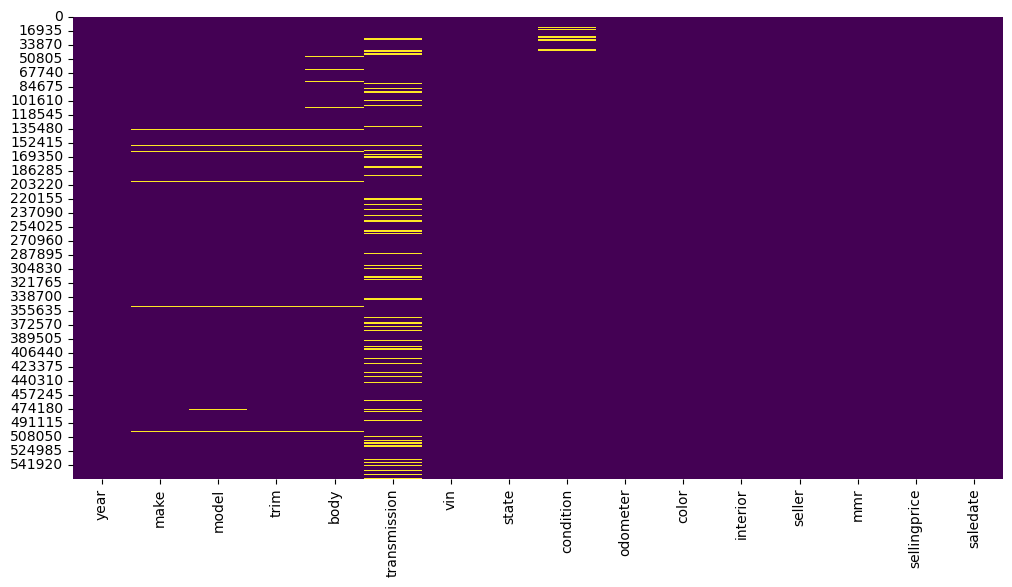

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [9]:
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [10]:
df.isnull().sum()/(df.shape[0])*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

In [11]:
fill_methods = {
    'make': 'mode',
    'model': 'mode',
    'trim': 'mode',
    'body': 'mode',
    'transmission': 'mode',
}
for column, method in fill_methods.items():
    if method == 'median':
        df[column].fillna(df[column].median(), inplace=True)
    elif method == 'mode':
        df[column].fillna(df[column].mode()[0], inplace=True)
# df.dropna(subset=['vin', 'sellingprice', 'saledate'], inplace=True)

print(df.isnull().mean() * 100)


C:\Users\eiadn\AppData\Local\Temp\ipykernel_10012\140374466.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


year            0.000000
make            0.000000
model           0.000000
trim            0.000000
body            0.000000
transmission    0.000000
vin             0.000716
state           0.000000
condition       2.115107
odometer        0.016821
color           0.134028
interior        0.134028
seller          0.000000
mmr             0.006800
sellingprice    0.002147
saledate        0.002147
dtype: float64


In [12]:
df = df.dropna(subset=['vin', 'sellingprice', 'saledate', 'mmr', 'make', 'color', 'odometer', 'condition', 'interior'])

In [13]:
columns_to_drop = ['vin']

df.drop(columns=columns_to_drop, inplace=True)

print(df.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


In [14]:
print(df.isnull().mean() * 100)

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64


In [15]:
df.shape

(546325, 15)

In [16]:
df.describe().T

count          mean           std     min      25%      50%  \
year          546325.0   2010.132280      3.906608  1982.0   2008.0   2012.0   
condition     546325.0     30.669557     13.400986     1.0     23.0     35.0   
odometer      546325.0  67289.743418  52781.847842     1.0  28072.0  51260.0   
mmr           546325.0  13903.192697   9652.965754    25.0   7375.0  12400.0   
sellingprice  546325.0  13751.715761   9724.318611     1.0   7100.0  12300.0   

                  75%       max  
year           2013.0    2015.0  
condition        42.0      49.0  
odometer      97438.0  999999.0  
mmr           18400.0  182000.0  
sellingprice  18300.0  230000.0

In [17]:
df.head()

year   make                model        trim   body transmission state  \
0  2015    Kia              Sorento          LX    SUV    automatic    ca   
1  2015    Kia              Sorento          LX    SUV    automatic    ca   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic    ca   
3  2015  Volvo                  S60          T5  Sedan    automatic    ca   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic    ca   

   condition  odometer  color interior  \
0        5.0   16639.0  white    black   
1        5.0    9393.0  white    beige   
2       45.0    1331.0   gray    black   
3       41.0   14282.0  white    black   
4       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [18]:
df.duplicated().sum()

0

In [19]:
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')

C:\Users\eiadn\AppData\Local\Temp\ipykernel_10012\3052553670.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')
C:\Users\eiadn\AppData\Local\Temp\ipykernel_10012\3052553670.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')


In [20]:
df.head()

year   make                model        trim   body transmission state  \
0  2015    Kia              Sorento          LX    SUV    automatic    ca   
1  2015    Kia              Sorento          LX    SUV    automatic    ca   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic    ca   
3  2015  Volvo                  S60          T5  Sedan    automatic    ca   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic    ca   

   condition  odometer  color interior  \
0        5.0   16639.0  white    black   
1        5.0    9393.0  white    beige   
2       45.0    1331.0   gray    black   
3       41.0   14282.0  white    black   
4       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                    saledate  
0  2014-12-16 12:30:00+08:00  
1  2014-12-16 12:30:00+08:00  
2  2015-01-15 04:30:00+08:00  
3  2015-01-29 04:30:00+08:00  
4  2014-12-18 12:30:00+08:00

In [21]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
sales_per_day = df['saledate'].dt.date.value_counts()

top_10_sales_days = sales_per_day.nlargest(10)

print("Top 10 sales days:")
print(top_10_sales_days)


Top 10 sales days:
saledate
2015-01-13    20898
2015-02-10    15902
2015-06-02    13882
2015-02-24    13799
2015-02-03    13787
2015-02-17    13540
2015-02-09    13040
2015-01-20    12206
2015-03-03    12102
2015-06-16    12087
Name: count, dtype: int64


In [22]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month
df['sale_day'] = df['saledate'].dt.day
df['sale_dayofweek'] = df['saledate'].dt.dayofweek
# df['sale_hour'] = df['saledate'].dt.hour

# df.drop('saledate', axis=1, inplace=True)

print(df)

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     Kia                 K900       Luxury      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission state  condition  odometer   color interior  \
0         automatic    ca        5.0   16639.0   white    black   
1         automatic    ca        5.0 

In [23]:
df.head()

year   make                model        trim   body transmission state  \
0  2015    Kia              Sorento          LX    SUV    automatic    ca   
1  2015    Kia              Sorento          LX    SUV    automatic    ca   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic    ca   
3  2015  Volvo                  S60          T5  Sedan    automatic    ca   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic    ca   

   condition  odometer  color interior  \
0        5.0   16639.0  white    black   
1        5.0    9393.0  white    beige   
2       45.0    1331.0   gray    black   
3       41.0   14282.0  white    black   
4       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                   saledate  sale_year  sale_month  sale_day  sale_dayofweek  
0 2014-12-16 04:30:00+00:00       2014          12        16               1  
1 2014-12-16 04:30:00+00:00       2014          12        16               1  
2 2015-01-14 20:30:00+00:00       2015           1        14               2  
3 2015-01-28 20:30:00+00:00       2015           1        28               2  
4 2014-12-18 04:30:00+00:00       2014          12        18               3

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546325 entries, 0 to 558836
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   year            546325 non-null  int64              
 1   make            546325 non-null  object             
 2   model           546325 non-null  object             
 3   trim            546325 non-null  object             
 4   body            546325 non-null  object             
 5   transmission    546325 non-null  object             
 6   state           546325 non-null  object             
 7   condition       546325 non-null  float64            
 8   odometer        546325 non-null  float64            
 9   color           546325 non-null  object             
 10  interior        546325 non-null  object             
 11  seller          546325 non-null  object             
 12  mmr             546325 non-null  float64            
 13  sellingprice    546

In [25]:
weird_rows_count = df[df['color'] == '—'].shape[0]
total_rows = df.shape[0]
percentage_weird_rows = (weird_rows_count / total_rows) * 100
print(f"Percentage of rows with weird 'color' values: {percentage_weird_rows:.2f}%")

Percentage of rows with weird 'color' values: 4.51%


In [26]:
most_common_color = df['color'].mode()[0]

df['color'] = df['color'].replace('—', most_common_color)
weird_rows_count = df[df['color'] == '—'].shape[0]
total_rows = df.shape[0]
percentage_weird_rows = (weird_rows_count / total_rows) * 100

print(f"Percentage of rows with weird 'color' values after replacement: {percentage_weird_rows:.2f}%")


Percentage of rows with weird 'color' values after replacement: 0.00%


In [27]:
df.head()

year   make                model        trim   body transmission state  \
0  2015    Kia              Sorento          LX    SUV    automatic    ca   
1  2015    Kia              Sorento          LX    SUV    automatic    ca   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic    ca   
3  2015  Volvo                  S60          T5  Sedan    automatic    ca   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic    ca   

   condition  odometer  color interior  \
0        5.0   16639.0  white    black   
1        5.0    9393.0  white    beige   
2       45.0    1331.0   gray    black   
3       41.0   14282.0  white    black   
4       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                   saledate  sale_year  sale_month  sale_day  sale_dayofweek  
0 2014-12-16 04:30:00+00:00       2014          12        16               1  
1 2014-12-16 04:30:00+00:00       2014          12        16               1  
2 2015-01-14 20:30:00+00:00       2015           1        14               2  
3 2015-01-28 20:30:00+00:00       2015           1        28               2  
4 2014-12-18 04:30:00+00:00       2014          12        18               3

In [28]:
# df['time_to_sold']=df['sale_year']- df['year']
# df['time_to_sold'] = df['time_to_sold'].replace({-1: 0})
# df.head()

In [29]:
unique_conditions = df['condition'].unique()

print("Unique values in 'condition':")
print(unique_conditions)


Unique values in 'condition':
[ 5. 45. 41. 43.  1. 34.  2. 42.  3. 48. 49. 17. 19. 29. 38. 44. 47. 32.
  4. 25. 37. 39. 31. 28. 46. 36. 35. 26. 21. 22. 27. 24. 33. 23. 15. 16.
 18. 12. 14. 11. 13.]


In [30]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(df.shape)


(453229, 19)


In [31]:
df.describe().T

count          mean           std     min      25%  \
year            453229.0   2010.506336      3.348728  2001.0   2008.0   
condition       453229.0     31.351937     12.922037     1.0     25.0   
odometer        453229.0  62584.953664  43739.574929     1.0  28432.0   
mmr             453229.0  13378.004221   7222.064187    25.0   8150.0   
sellingprice    453229.0  13212.199425   7314.278112     1.0   7900.0   
sale_year       453229.0   2015.000000      0.000000  2015.0   2015.0   
sale_month      453229.0      2.940008      1.919326     1.0      1.0   
sale_day        453229.0     13.825309      8.455148     1.0      6.0   
sale_dayofweek  453229.0      1.304193      1.034843     0.0      0.0   

                    50%      75%       max  
year             2012.0   2013.0    2015.0  
condition          35.0     42.0      49.0  
odometer        49887.0  91782.0  194007.0  
mmr             12500.0  18000.0   34500.0  
sellingprice    12400.0  17900.0   33200.0  
sale_year        2015.0   2015.0    2015.0  
sale_month          2.0      5.0       7.0  
sale_day           14.0     20.0      31.0  
sale_dayofweek      1.0      2.0       4.0

In [32]:
state_names = {
    'ca': 'California', 'tx': 'Texas', 'pa': 'Pennsylvania', 'mn': 'Minnesota',
    'az': 'Arizona', 'wi': 'Wisconsin', 'tn': 'Tennessee', 'md': 'Maryland',
    'fl': 'Florida', 'ne': 'Nebraska', 'nj': 'New Jersey', 'nv': 'Nevada',
    'oh': 'Ohio', 'mi': 'Michigan', 'ga': 'Georgia', 'va': 'Virginia',
    'sc': 'South Carolina', 'nc': 'North Carolina', 'in': 'Indiana', 
    'il': 'Illinois', 'co': 'Colorado', 'ut': 'Utah', 'mo': 'Missouri', 
    'ny': 'New York', 'ma': 'Massachusetts', 'pr': 'Puerto Rico', 'or': 'Oregon', 
    'la': 'Louisiana', 'wa': 'Washington', 'hi': 'Hawaii', 'qc': 'Quebec', 
    'ab': 'Alberta', 'on': 'Ontario', 'ok': 'Oklahoma', 'ms': 'Mississippi', 
    'nm': 'New Mexico', 'al': 'Alabama', 'ns': 'Nova Scotia'
}

In [33]:
df['Pricr_diff']=df['sellingprice']- df['mmr']

In [34]:
df['state'] = df['state'].map(state_names)

In [35]:
df.head()

year       make     model        trim         body transmission  \
2   2014        BMW  3 Series  328i SULEV        Sedan    automatic   
3   2015      Volvo       S60          T5        Sedan    automatic   
9   2014  Chevrolet    Camaro          LT  Convertible    automatic   
12  2015       Ford    Fusion          SE        Sedan    automatic   
20  2015  Chevrolet    Impala         LTZ        Sedan    automatic   

         state  condition  odometer   color interior  \
2   California       45.0    1331.0    gray    black   
3   California       41.0   14282.0   white    black   
9   California        3.0    4809.0     red    black   
12  California        2.0    5559.0   white    beige   
20  California       19.0   14538.0  silver    black   

                                               seller      mmr  sellingprice  \
2              financial services remarketing (lease)  31900.0       30000.0   
3                             volvo na rep/world omni  27500.0       27750.0   
9                                  d/m auto sales inc  26300.0       17500.0   
12  enterprise vehicle exchange / tra / rental / t...  15350.0       12000.0   
20  enterprise vehicle exchange / tra / rental / t...  24300.0        7200.0   

                    saledate  sale_year  sale_month  sale_day  sale_dayofweek  \
2  2015-01-14 20:30:00+00:00       2015           1        14               2   
3  2015-01-28 20:30:00+00:00       2015           1        28               2   
9  2015-01-19 20:00:00+00:00       2015           1        19               0   
12 2015-01-13 04:00:00+00:00       2015           1        13               1   
20 2015-07-07 02:30:00+00:00       2015           7         7               1   

    Pricr_diff  
2      -1900.0  
3        250.0  
9      -8800.0  
12     -3350.0  
20    -17100.0

In [36]:
def outliers_handling(x, p1=0.25, p2=0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return x[(x > min_limit) & (x < max_limit)]

In [37]:
# df2 = df.copy()
for col in ['odometer','mmr','sellingprice']:
    df[col] = outliers_handling(df[col])

In [38]:
# import  plotly.express  as px
# df['Pricr_diff'] = outliers_handling(df['Price_diff'])
# fig = px.box(df, y='Pricr_diff')
# fig.show()

In [39]:
df['Pricr_diff'] = outliers_handling(df['Pricr_diff'])
fig=px.box(df, y = 'Pricr_diff')
fig.show()

NameError: name 'px' is not defined

In [547]:
df.isnull().sum()/(df.shape[0])*100

year              0.000000
make              0.000000
model             0.000000
trim              0.000000
body              0.000000
transmission      0.000000
state             0.000000
condition         0.000000
odometer          0.476139
color             0.000000
interior          0.000000
seller            0.000000
mmr               0.358759
sellingprice      0.167465
saledate          0.000000
sale_year         0.000000
sale_month        0.000000
sale_day          0.000000
sale_dayofweek    0.000000
Pricr_diff        5.807440
dtype: float64

In [548]:
df['new_selling_price']=df['Pricr_diff']+ df['mmr']


In [549]:
def unify_condition(value):
    if 1 <= value <= 5:
        return value
    elif 10 <= value <= 50:
        return round(value / 10)  
    else:
        return None

df['Tight_condition'] = df['condition'].apply(unify_condition)
df['Tight_condition']

2         4.0
3         4.0
9         3.0
12        2.0
20        2.0
         ... 
558830    3.0
558831    4.0
558833    5.0
558835    4.0
558836    3.0
Name: Tight_condition, Length: 453229, dtype: float64

In [551]:
df['Tight_condition'].isnull().sum()/(df.shape[0])*100


0.0

In [491]:
unique_conditions = df['condition'].unique()

unique_conditions

array([45., 41.,  3.,  2., 19., 29., 42., 48.,  5., 34.,  1.,  4., 21.,
       37., 39., 31., 38., 35., 24., 36., 23., 44., 43., 28., 27., 26.,
       25., 32., 33., 49., 47., 46., 22., 18., 17., 14., 12., 16., 15.,
       11., 13.])

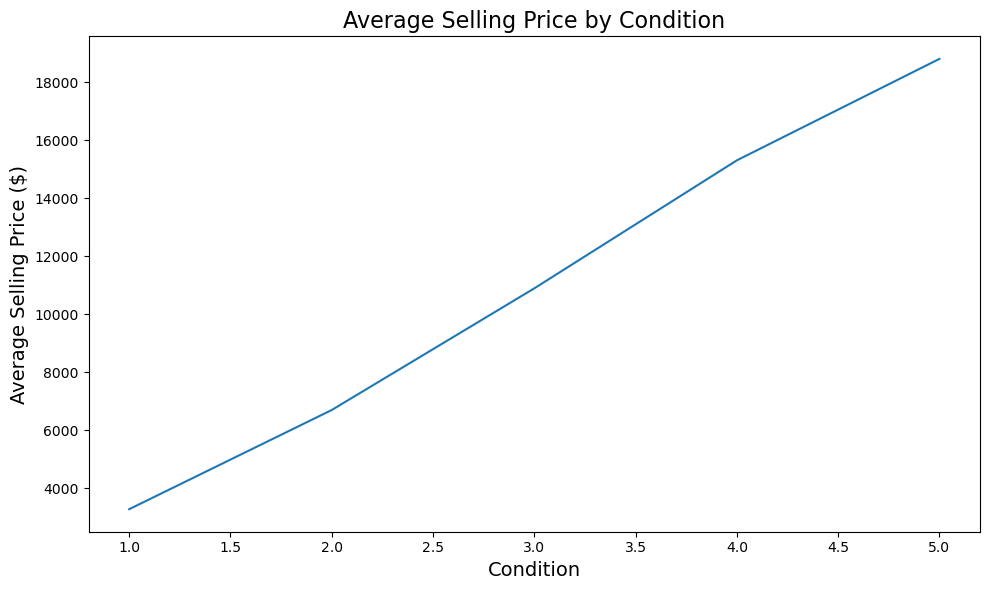

In [492]:
avg_price_by_condition = df.groupby('Tight_condition')['new_selling_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_condition, x='Tight_condition', y='new_selling_price')

plt.title('Average Selling Price by Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Average Selling Price ($)', fontsize=14)

plt.tight_layout()
plt.show()

In [493]:
df['Tight_condition'] = df['Tight_condition'].astype(int)

In [494]:
record_counts = df['Tight_condition'].value_counts().reset_index()
record_counts 

Tight_condition   count
0                4  210077
1                3  105413
2                2   83629
3                5   49299
4                1    4811

In [495]:
df['seller'].unique()

array(['financial services remarketing (lease)',
       'volvo na rep/world omni', 'd/m auto sales inc', ...,
       'chesterfield motorsports llc', 'alternative financial group inc',
       'i -5 uhlmann rv'], dtype=object)

In [496]:
df['seller'] = df['seller'].str.lower().str.strip()
df['seller'] = df['seller'].str.replace('-', ' ', regex=False)
df['seller'].value_counts()

seller
nissan infiniti lt               27593
ford motor credit company llc    17684
the hertz corporation            17355
santander consumer               12163
avis corporation                 11588
                                 ...  
california auto sales                1
marvelous motors                     1
wfj auto wholesale llc               1
tripoli auto sales llc               1
i  5 uhlmann rv                      1
Name: count, Length: 11630, dtype: int64

In [497]:
df['seller'].unique()

array(['financial services remarketing (lease)',
       'volvo na rep/world omni', 'd/m auto sales inc', ...,
       'chesterfield motorsports llc', 'alternative financial group inc',
       'i  5 uhlmann rv'], dtype=object)

In [498]:
weird_rows_count = df[df['interior'] == '—'].shape[0]
total_rows = df.shape[0]
percentage_weird_rows = (weird_rows_count / total_rows) * 100
percentage_weird_rows

1.8838159076316827

In [499]:
most_common_interior = df['interior'].mode()[0]
df['interior'] = df['interior'].replace('—', most_common_interior)
weird_rows_count = df[df['interior'] == '—'].shape[0]
total_rows = df.shape[0]
percentage_weird_rows = (weird_rows_count / total_rows) * 100

print(f"Percentage of rows with weird 'interior' values after replacement: {percentage_weird_rows:.2f}%")


Percentage of rows with weird 'interior' values after replacement: 0.00%


In [500]:
df.isnull().mean() * 100

year                 0.000000
make                 0.000000
model                0.000000
trim                 0.000000
body                 0.000000
transmission         0.000000
state                0.000000
condition            0.000000
odometer             0.476139
color                0.000000
interior             0.000000
seller               0.000000
mmr                  0.358759
sellingprice         0.167465
saledate             0.000000
sale_year            0.000000
sale_month           0.000000
sale_day             0.000000
sale_dayofweek       0.000000
Pricr_diff           5.807440
new_selling_price    6.083238
Tight_condition      0.000000
dtype: float64

In [501]:
df = df.dropna(subset=['new_selling_price'])
df = df.dropna(subset=['odometer'])
df = df.drop(columns=['Pricr_diff'])
df = df.drop(columns=['sellingprice'])
print(df.shape)


(423573, 20)


In [502]:
df.isnull().mean() * 100

year                 0.0
make                 0.0
model                0.0
trim                 0.0
body                 0.0
transmission         0.0
state                0.0
condition            0.0
odometer             0.0
color                0.0
interior             0.0
seller               0.0
mmr                  0.0
saledate             0.0
sale_year            0.0
sale_month           0.0
sale_day             0.0
sale_dayofweek       0.0
new_selling_price    0.0
Tight_condition      0.0
dtype: float64

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423573 entries, 2 to 558836
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   year               423573 non-null  int64              
 1   make               423573 non-null  object             
 2   model              423573 non-null  object             
 3   trim               423573 non-null  object             
 4   body               423573 non-null  object             
 5   transmission       423573 non-null  object             
 6   state              423573 non-null  object             
 7   condition          423573 non-null  float64            
 8   odometer           423573 non-null  float64            
 9   color              423573 non-null  object             
 10  interior           423573 non-null  object             
 11  seller             423573 non-null  object             
 12  mmr                423573 non-null 

In [504]:
transmission_counts = df["odometer"].value_counts(normalize=True) * 100
transmission_counts

odometer
1.0         0.064216
34032.0     0.003777
33551.0     0.003777
34753.0     0.003777
35482.0     0.003777
              ...   
113435.0    0.000236
2927.0      0.000236
115084.0    0.000236
78037.0     0.000236
5252.0      0.000236
Name: proportion, Length: 143817, dtype: float64

In [505]:
df.head()

year   make     model        trim   body transmission       state  \
2   2014    BMW  3 Series  328i SULEV  Sedan    automatic  California   
3   2015  Volvo       S60          T5  Sedan    automatic  California   
26  2015  Volvo      XC70          T6  Wagon    automatic  California   
27  2015  Volvo      XC70          T6  Wagon    automatic  California   
37  2014    BMW  3 Series  328i SULEV  Sedan    automatic  California   

    condition  odometer  color interior  \
2        45.0    1331.0   gray    black   
3        41.0   14282.0  white    black   
26       42.0   16506.0  brown    brown   
27       48.0   12725.0  beige    beige   
37        5.0     111.0  black    black   

                                    seller      mmr                  saledate  \
2   financial services remarketing (lease)  31900.0 2015-01-14 20:30:00+00:00   
3                  volvo na rep/world omni  27500.0 2015-01-28 20:30:00+00:00   
26                 volvo na rep/world omni  32100.0 2015-02-25 20:30:00+00:00   
27                 volvo na rep/world omni  32300.0 2015-02-11 20:30:00+00:00   
37  financial services remarketing (lease)  32200.0 2015-01-14 20:30:00+00:00   

    sale_year  sale_month  sale_day  sale_dayofweek  new_selling_price  \
2        2015           1        14               2            30000.0   
3        2015           1        28               2            27750.0   
26       2015           2        25               2            32500.0   
27       2015           2        11               2            32500.0   
37       2015           1        14               2            30500.0   

    Tight_condition  
2                 4  
3                 4  
26                4  
27                5  
37                5

In [506]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'saledate', 'sale_year', 'sale_month', 'sale_day', 'sale_dayofweek',
       'new_selling_price', 'Tight_condition'],
      dtype='object')

In [507]:
df.to_csv('MLCarPrices.csv', index=False)

SyntaxError: invalid syntax (3574307662.py, line 1)

In [249]:
df.shape

(387485, 22)

In [250]:

# # df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')

# # ترميز المتغيرات الفئوية
# categorical_cols = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']
# encoder = OneHotEncoder(sparse_output=True, drop='first')
# encoded_features = encoder.fit_transform(df[categorical_cols])

# # دمج الميزات الترميزية مع بيانات الرقم باستخدام مصفوفات متفرقة
# X = pd.concat([df[['year', 'condition', 'odometer', 'mmr']].reset_index(drop=True), 
#                pd.DataFrame.sparse.from_spmatrix(encoded_features, columns=encoder.get_feature_names_out(categorical_cols)).reset_index(drop=True)], 
#               axis=1)
# y = df['sellingprice']

# # تقسيم البيانات إلى تدريب واختبار
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # إنشاء النموذج
# model = LinearRegression()
# model.fit(X_train, y_train)

# # التنبؤ
# y_pred = model.predict(X_test)

# # تقييم النموذج
# mse = mean_squared_error(y_test, y_pred)
# rmse = mse ** 0.5
# r2 = r2_score(y_test, y_pred)

# print(f'RMSE: {rmse}')
# print(f'R^2: {r2}')


## **EDA**

### Univariant Analysis

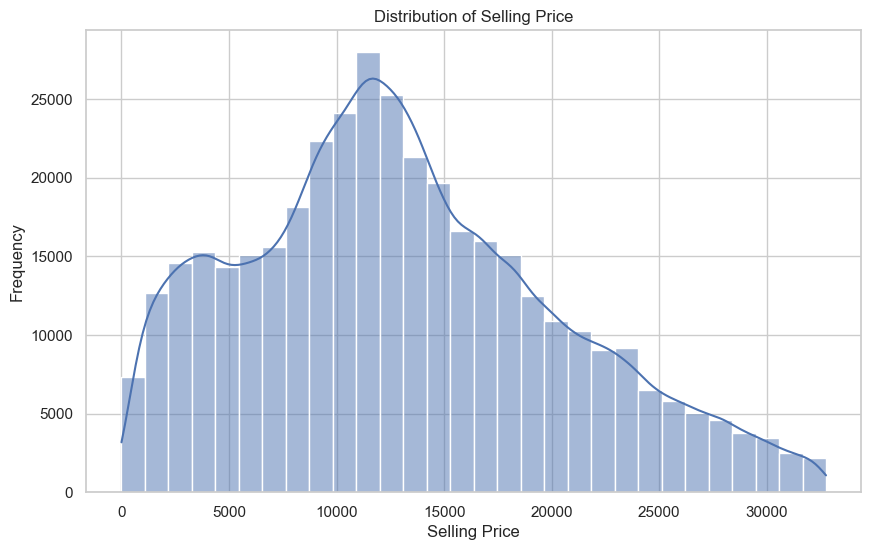

In [251]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sellingprice'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

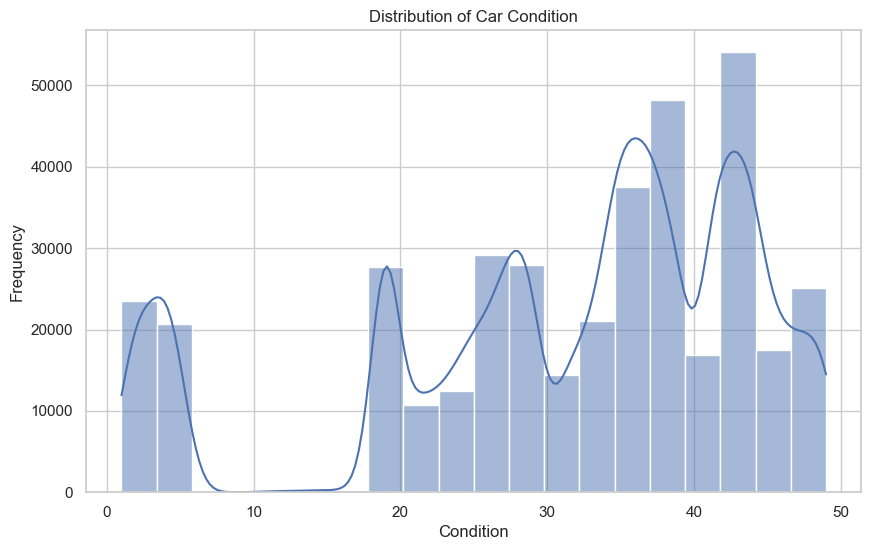

In [252]:
plt.figure(figsize=(10, 6))
sns.histplot(df['condition'], bins=20, kde=True)
plt.title('Distribution of Car Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

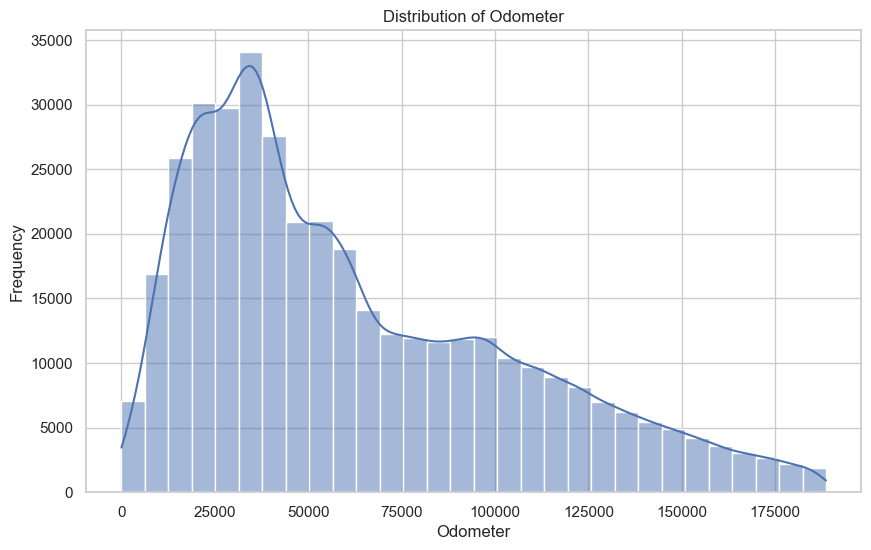

In [253]:
plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'], bins=30, kde=True)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

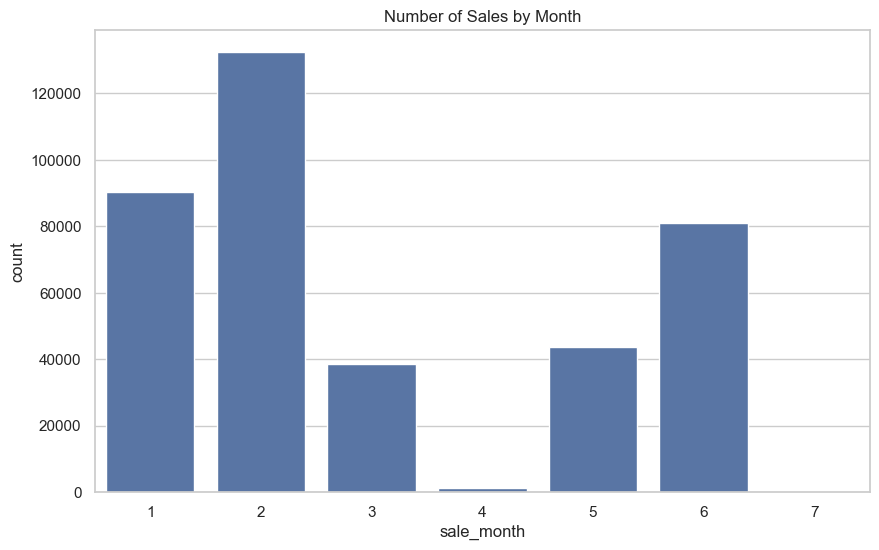

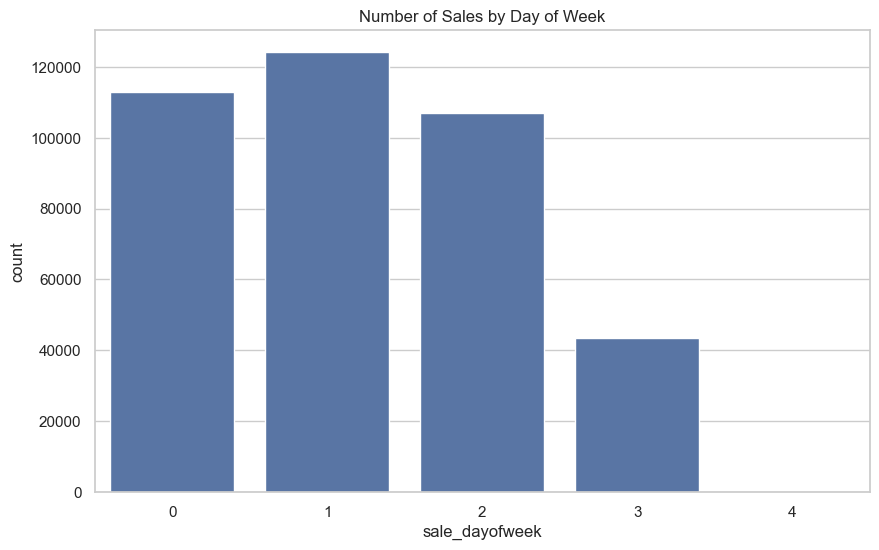

In [254]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sale_month', data=df)
plt.title('Number of Sales by Month')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='sale_dayofweek', data=df)
plt.title('Number of Sales by Day of Week')
plt.show()

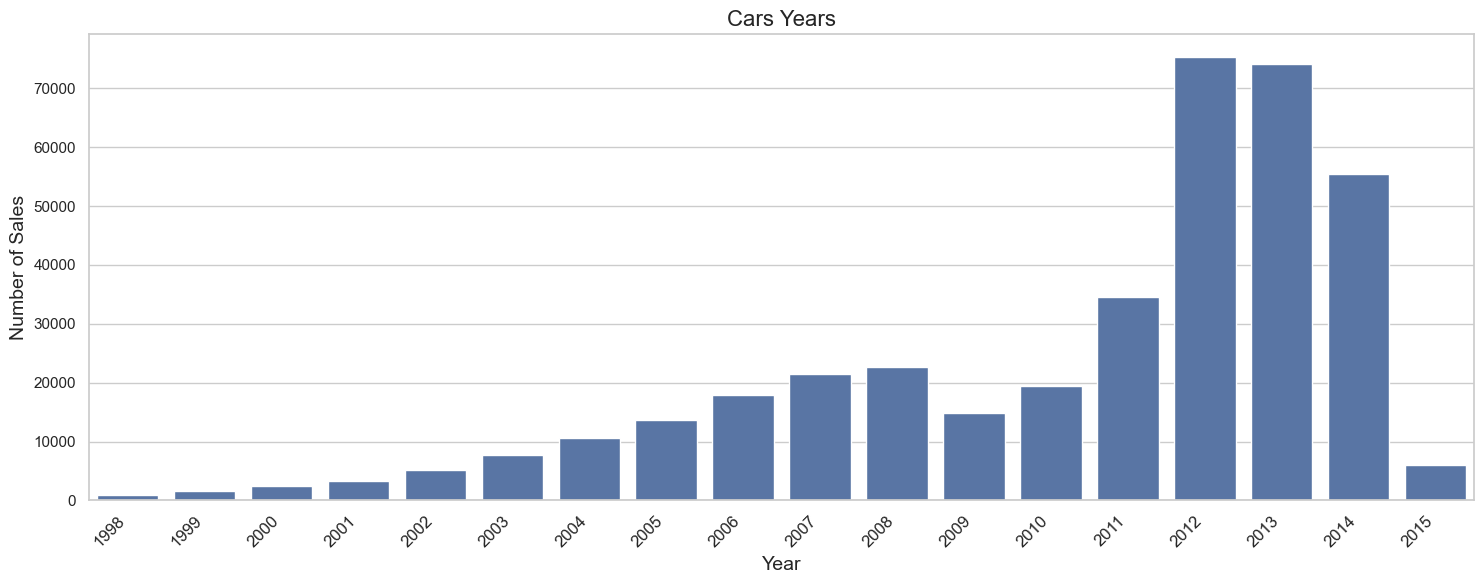

In [255]:
plt.figure(figsize=(15, 6))  
sns.countplot(x='year', data=df)
plt.title('Cars Years', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)

plt.tight_layout()  
plt.show()

In [256]:
df.shape

(387485, 22)

In [257]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'sale_year', 'sale_month', 'sale_day',
       'sale_dayofweek', 'sale_hour', 'Pricr_diff', 'Tight_condition'],
      dtype='object')

In [258]:
# df['saledate'] = pd.to_datetime(df['saledate'])
# df.set_index('saledate')['sellingprice'].resample('M').mean().plot(figsize=(10,6))
# plt.title('Average Selling Price Over Time')
# plt.show()

C:\Users\eiadn\AppData\Local\Temp\ipykernel_19632\2599326277.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




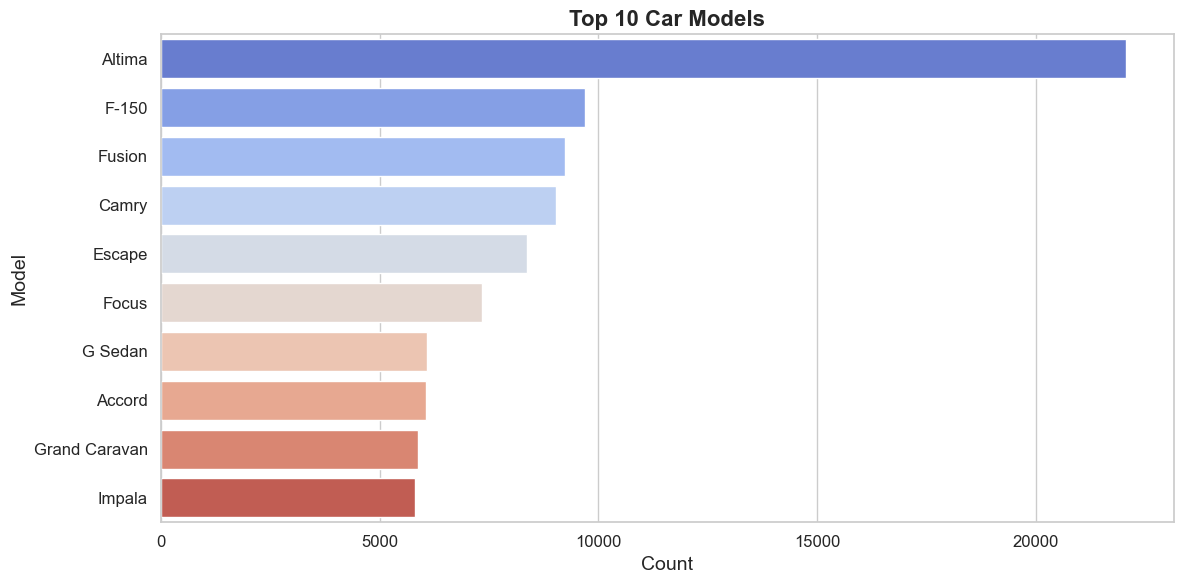

In [259]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")  
sns.countplot(y='model', data=df, order=df['model'].value_counts().index[:10], palette='coolwarm')  
plt.title('Top 10 Car Models', fontsize=16, fontweight='bold')  
plt.xlabel('Count', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  
plt.show()


C:\Users\eiadn\AppData\Local\Temp\ipykernel_19632\4088937228.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




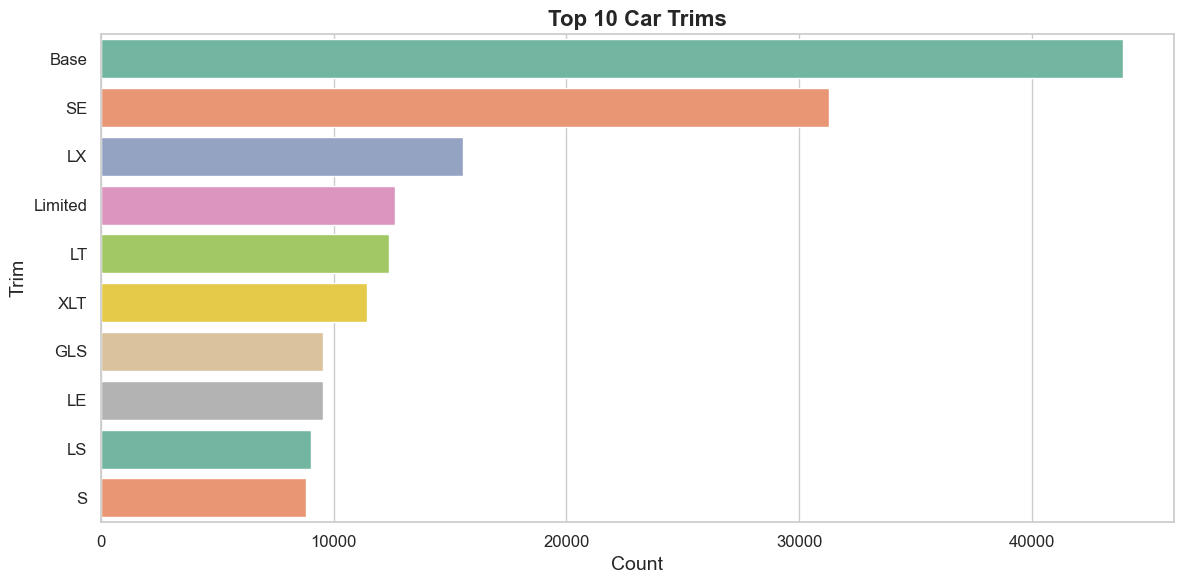

In [260]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")  
sns.countplot(y='trim', data=df, order=df['trim'].value_counts().index[:10], palette='Set2')  # استخدام لوحة ألوان Set2
plt.title('Top 10 Car Trims', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Trim', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\eiadn\AppData\Local\Temp\ipykernel_19632\3003293032.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




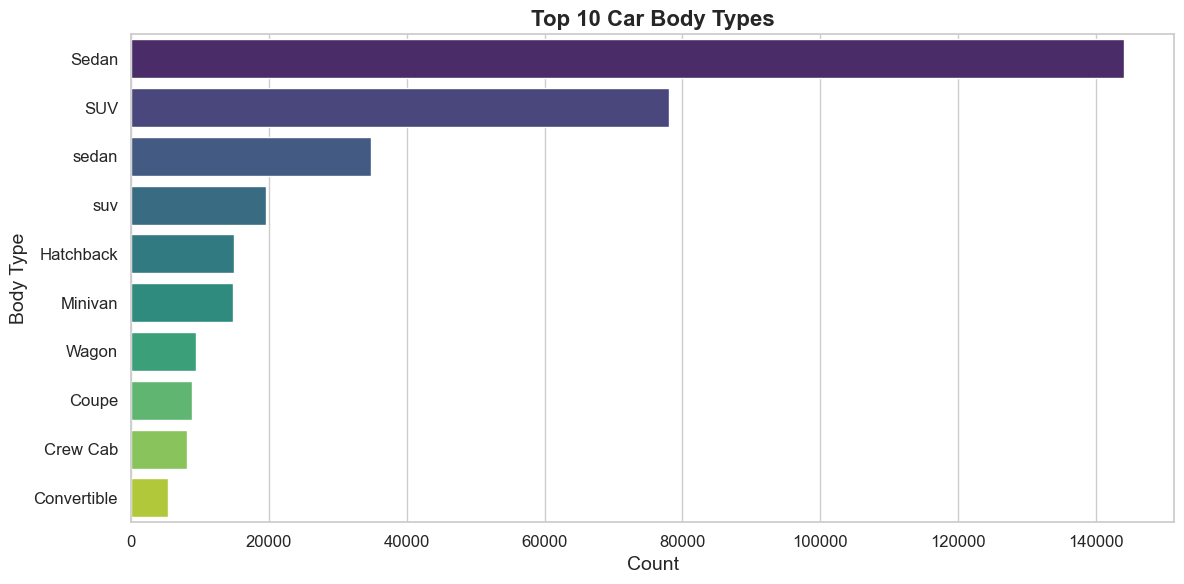

In [261]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")  # نفس النمط
sns.countplot(y='body', data=df, order=df['body'].value_counts().index[:10], palette='viridis')  
plt.title('Top 10 Car Body Types', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Body Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


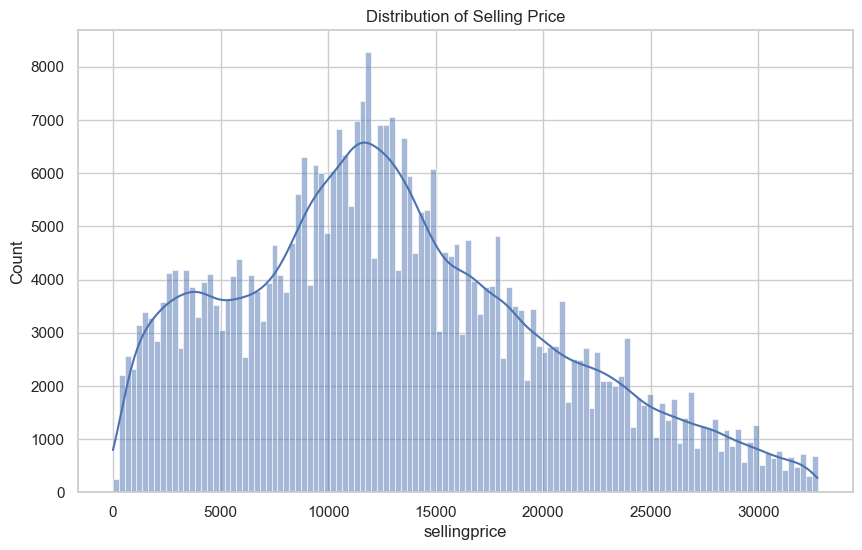

In [262]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sellingprice'], kde=True)
plt.title('Distribution of Selling Price')
plt.show()

C:\Users\eiadn\AppData\Local\Temp\ipykernel_19632\2915948627.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




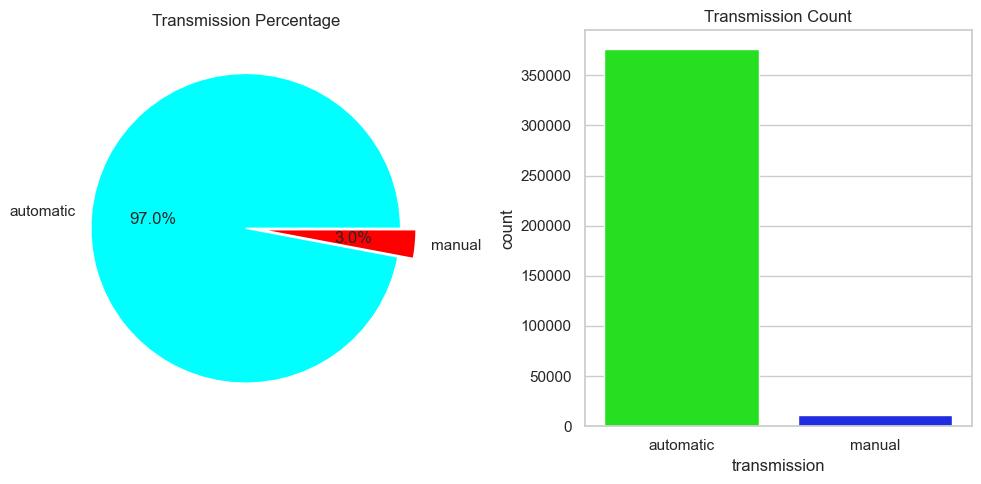

In [263]:

fig = plt.figure(figsize=(10, 5))
axes = fig.subplots(1, 2)
transmission = df['transmission'].value_counts()
axes[0].pie(transmission, labels=transmission.index, autopct="%1.1f%%", explode=[0, 0.1], colors=['cyan', 'red'])
axes[0].set_title('Transmission Percentage')
sns.countplot(data=df, x='transmission', ax=axes[1], palette='hsv')
axes[1].set_title('Transmission Count')

plt.tight_layout()
plt.show()


In [264]:
state_names = {
    'ca': 'California', 'tx': 'Texas', 'pa': 'Pennsylvania', 'mn': 'Minnesota',
    'az': 'Arizona', 'wi': 'Wisconsin', 'tn': 'Tennessee', 'md': 'Maryland',
    'fl': 'Florida', 'ne': 'Nebraska', 'nj': 'New Jersey', 'nv': 'Nevada',
    'oh': 'Ohio', 'mi': 'Michigan', 'ga': 'Georgia', 'va': 'Virginia',
    'sc': 'South Carolina', 'nc': 'North Carolina', 'in': 'Indiana', 
    'il': 'Illinois', 'co': 'Colorado', 'ut': 'Utah', 'mo': 'Missouri', 
    'ny': 'New York', 'ma': 'Massachusetts', 'pr': 'Puerto Rico', 'or': 'Oregon', 
    'la': 'Louisiana', 'wa': 'Washington', 'hi': 'Hawaii', 'qc': 'Quebec', 
    'ab': 'Alberta', 'on': 'Ontario', 'ok': 'Oklahoma', 'ms': 'Mississippi', 
    'nm': 'New Mexico', 'al': 'Alabama', 'ns': 'Nova Scotia'
}


In [265]:
df['state_full'] = df['state'].map(state_names)

C:\Users\eiadn\AppData\Local\Temp\ipykernel_19632\1249283094.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\eiadn\AppData\Local\Temp\ipykernel_19632\1249283094.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



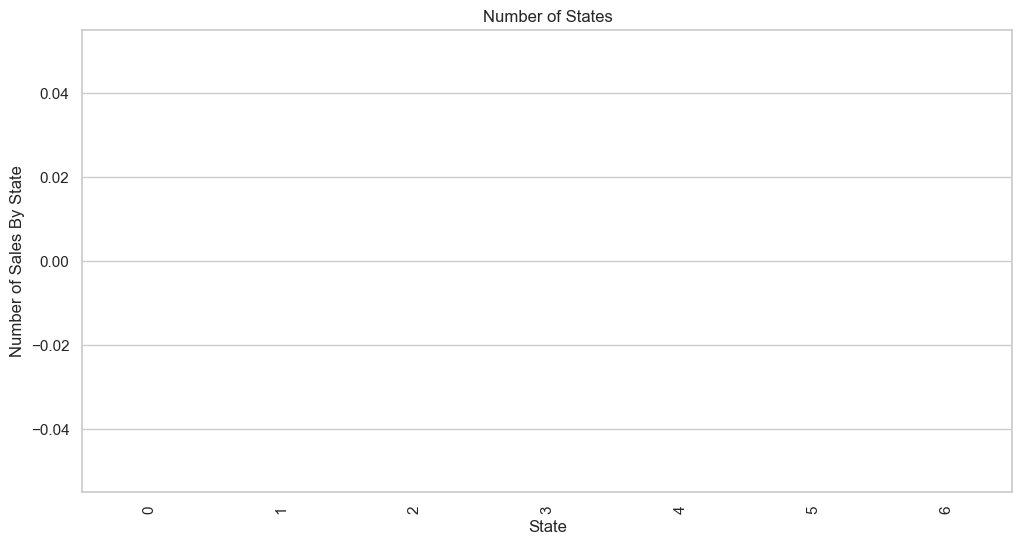

In [266]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state_full', palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of States')
plt.xlabel('State')
plt.ylabel('Number of Sales By State')
plt.show()


C:\Users\eiadn\AppData\Local\Temp\ipykernel_19632\2828465938.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




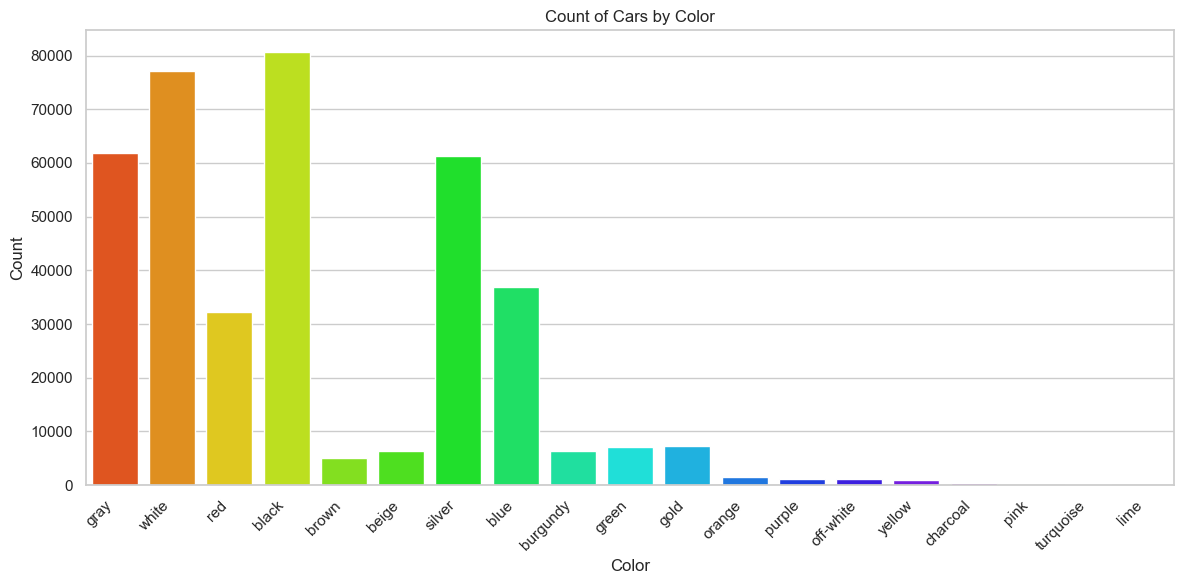

In [267]:
plt.figure(figsize=(12, 6))
sns.countplot(x='color', data=df, palette='hsv')
plt.xticks(rotation=45, ha='right')  

plt.title('Count of Cars by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.tight_layout()  
plt.show()

## **Bivariante Visualizations**

In [268]:
state_sales = df.groupby('state_full')['sellingprice'].sum().sort_values(ascending=False)

top_6_states = state_sales.nlargest(5)

other_sales = state_sales.iloc[4:].sum()
other_series = pd.Series({'Other': other_sales})

top_6_states = pd.concat([top_6_states, other_series])


plt.figure(figsize=(12, 12))
colors = sns.color_palette("Paired", len(top_6_states)) 
plt.pie(top_6_states.values, 
        labels=top_6_states.index, 
        autopct='%1.1f%%', 
        # explode=explode, 
        colors=colors, 
        startangle=290, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Percentage of Sales by State (Top 6 + Other)', fontsize=16)
plt.tight_layout()
plt.show()


c:\Users\eiadn\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:3232: RuntimeWarning:

invalid value encountered in divide



ValueError: need at least one array to concatenate

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1200x1200 with 1 Axes>

In [408]:
transmission=df.transmission.value_counts()
transmission

transmission
automatic    375978
manual        11507
Name: count, dtype: int64

In [409]:
unique_states = df['state'].unique()
unique_states

array(['ca', 'wi', 'fl', 'nj', 'va', 'mn', 'oh', 'il', 'mi', 'co', 'mo',
       'pa', 'ut', 'ga', 'ne', 'tx', 'nc', 'md', 'sc', 'tn', 'nv', 'az',
       'in', 'wa', 'pr', 'ny', 'ma', 'la', 'qc', 'hi', 'ab', 'or', 'on',
       'ms', 'ok', 'nm', 'al', 'ns'], dtype=object)

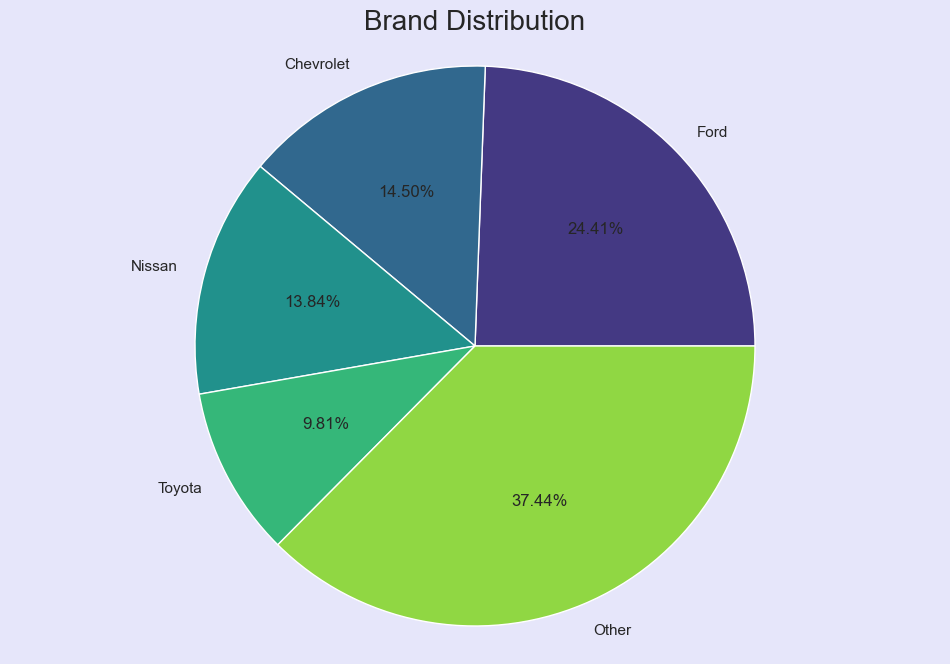

In [410]:
brand_car = df.groupby('make', as_index=False)['model'].count().sort_values('model', ascending=False)
top_10 = brand_car.head(4)
other_total = brand_car.iloc[10:]['model'].sum()
other_data = pd.DataFrame({'make': ['Other'], 'model': [other_total]})

combin_data = pd.concat([top_10, other_data])
plt.figure(figsize=(12, 8), facecolor='lavender')
plt.pie(combin_data['model'], labels=combin_data['make'], autopct='%1.2f%%', colors=sns.color_palette('viridis', len(combin_data)))
plt.title('Brand Distribution', fontsize=20)
plt.axis('equal') 
plt.show()

C:\Users\eiadn\AppData\Local\Temp\ipykernel_22152\4059374882.py:2: UserWarning: 
The markers list has fewer values (3) than needed (73) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='condition', y='sellingprice', data=df, hue='make', style='make', palette='viridis', markers=['o', 's', 'D'])
c:\Users\eiadn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


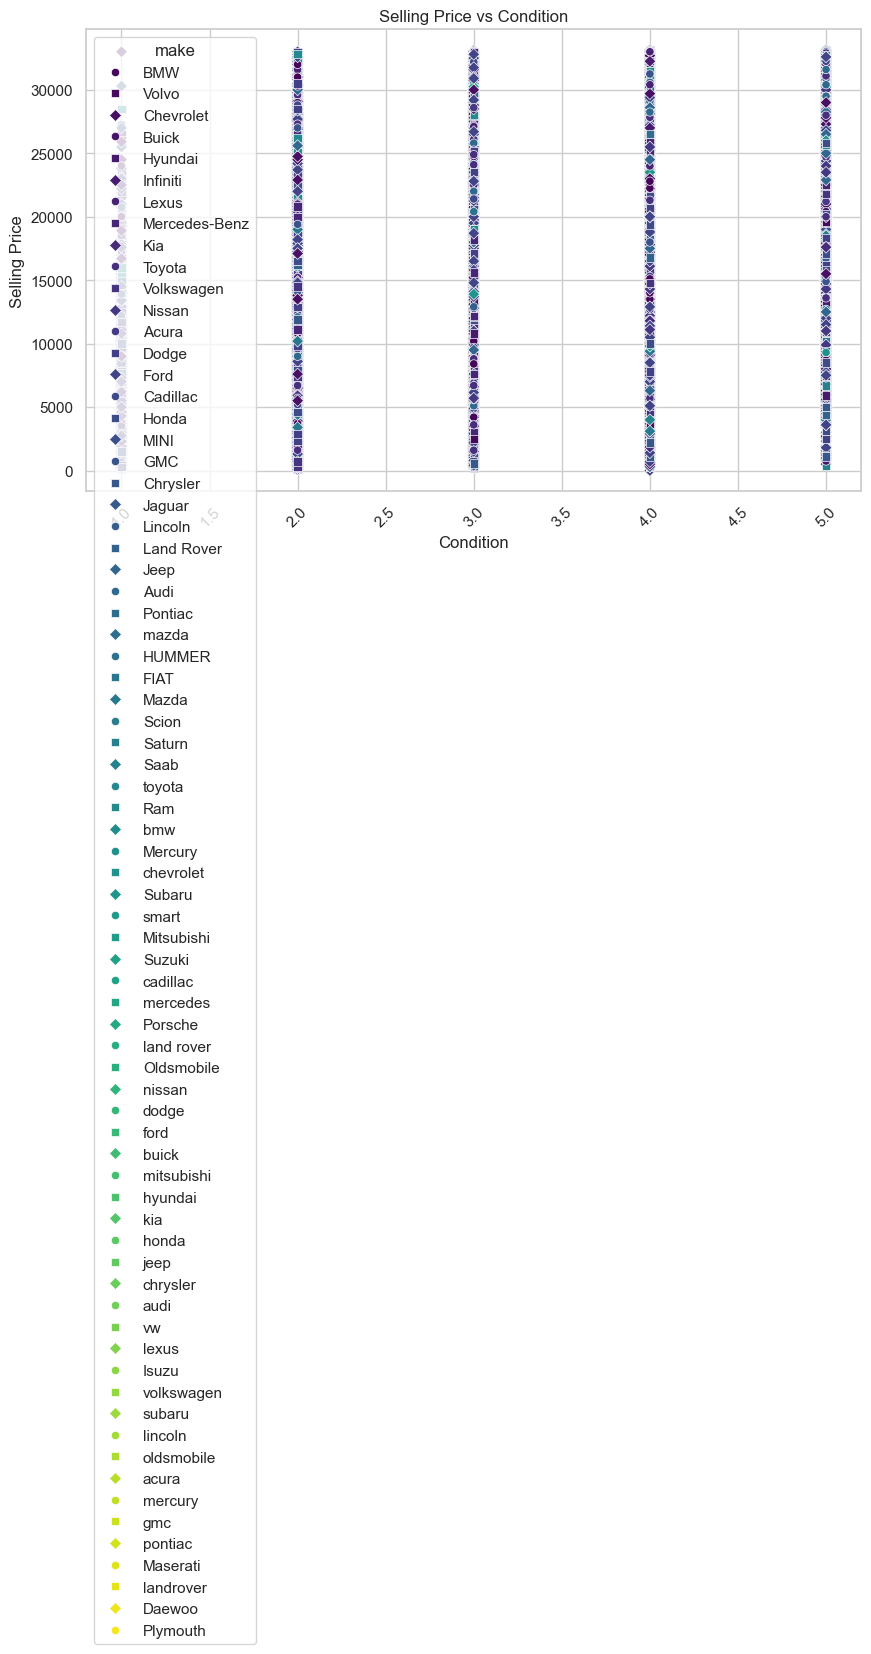

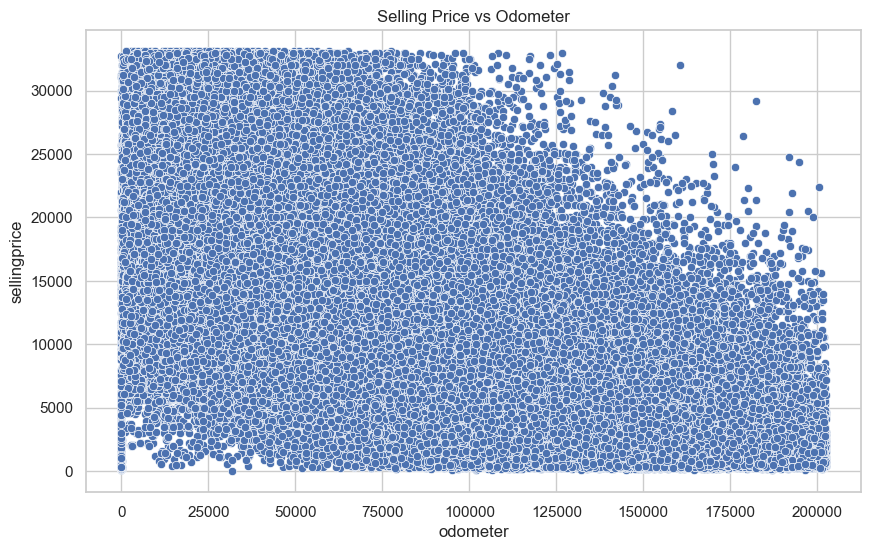

In [411]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='condition', y='sellingprice', data=df, hue='make', style='make', palette='viridis', markers=['o', 's', 'D'])
plt.title('Selling Price vs Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)  
plt.grid(True) 
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='sellingprice', data=df)
plt.title('Selling Price vs Odometer')
plt.show()

In [412]:
df['seller'] = df['seller'].str.lower().str.strip()
df['seller'] = df['seller'].str.replace('-', ' ', regex=False)
df['seller'].value_counts()

seller
nissan infiniti lt               23696
the hertz corporation            16028
ford motor credit company llc    13913
santander consumer               10782
avis corporation                 10501
                                 ...  
j & c auto sales inc                 1
payless auto sales inc               1
moon township ford                   1
image cars                           1
g brothers auto brokers inc          1
Name: count, Length: 11002, dtype: int64

In [413]:
df['seller'] = df['seller'].str.lower().str.strip()
df['seller'] = df['seller'].replace({
    'nissan-infiniti lt': 'nissan infiniti lt'
})

In [414]:
top_sellers = df.groupby('seller')['sellingprice'].sum().nlargest(5).reset_index()
top_sellers


seller  sellingprice
0             nissan infiniti lt   385922780.0
1  ford motor credit company llc   242525700.0
2          the hertz corporation   208136906.0
3               avis corporation   160506100.0
4             santander consumer    87073340.0

C:\Users\eiadn\AppData\Local\Temp\ipykernel_22152\3047657454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sellers, x='sellingprice', y='seller', palette='viridis')


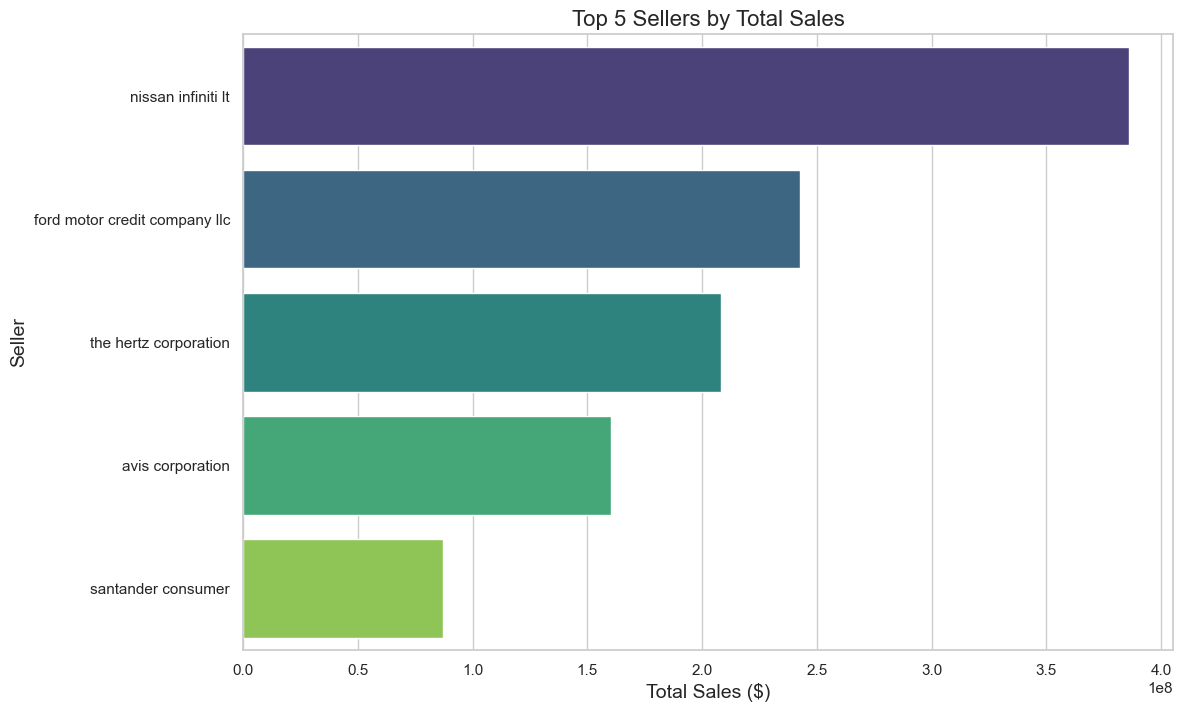

In [415]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_sellers, x='sellingprice', y='seller', palette='viridis')
plt.title('Top 5 Sellers by Total Sales', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('Seller', fontsize=14)

plt.show()


C:\Users\eiadn\AppData\Local\Temp\ipykernel_22152\3945316787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_body_prices, x='body', y='sellingprice', palette='muted')


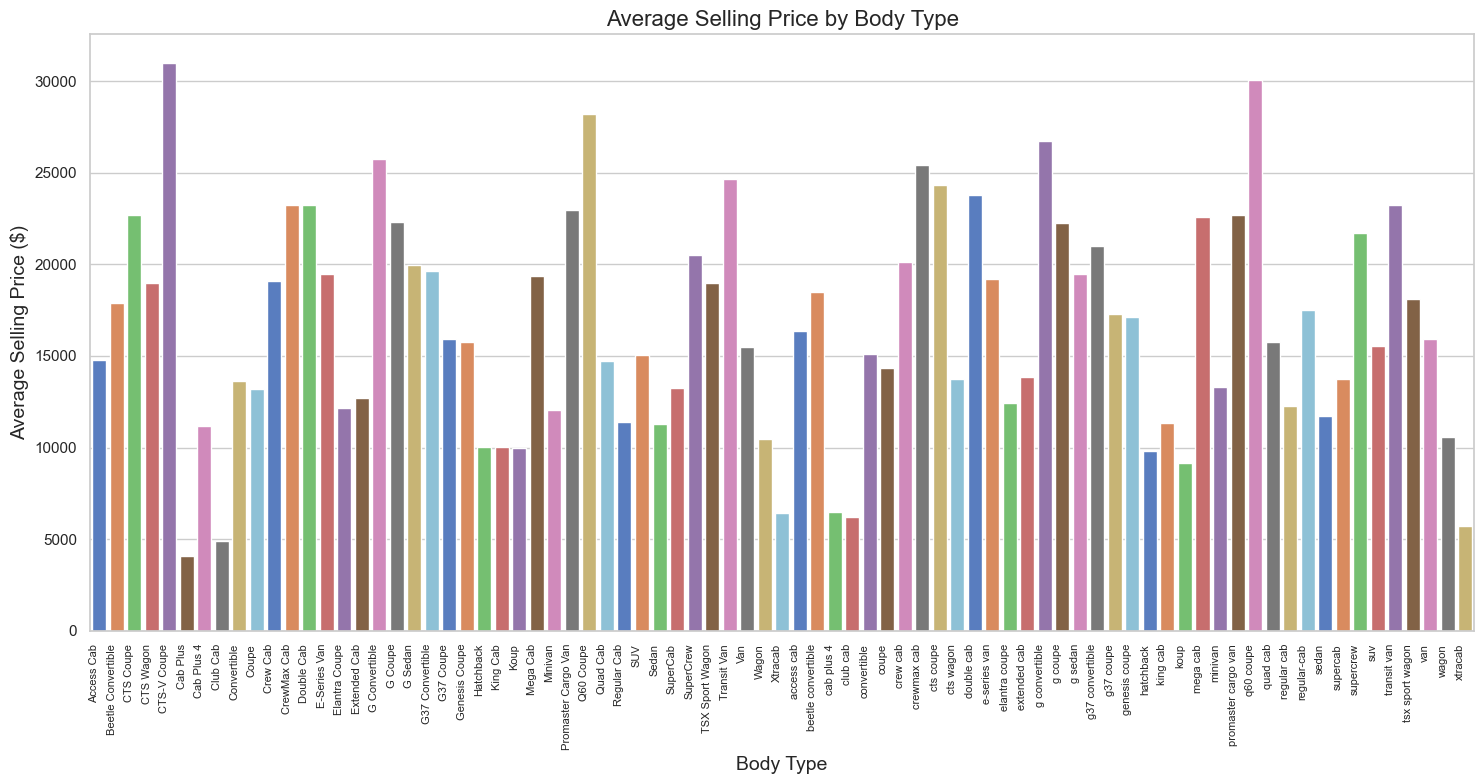

In [416]:
plt.figure(figsize=(15, 8))  
avg_body_prices = df.groupby('body')['sellingprice'].mean().reset_index()
sns.barplot(data=avg_body_prices, x='body', y='sellingprice', palette='muted')

plt.title('Average Selling Price by Body Type', fontsize=16)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Average Selling Price ($)', fontsize=14)

plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.show()


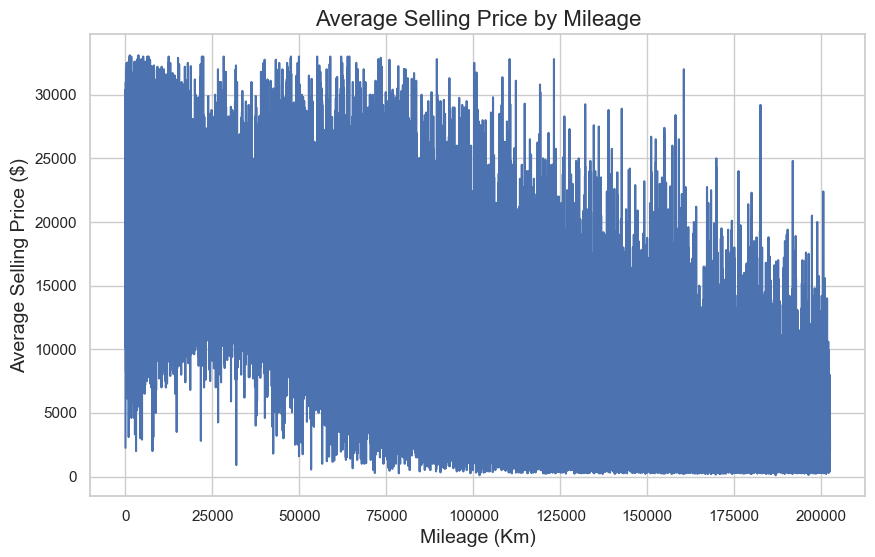

In [417]:
avg_price_by_mileage = df.groupby('odometer')['sellingprice'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_mileage, x='odometer', y='sellingprice')

plt.title('Average Selling Price by Mileage', fontsize=16)
plt.xlabel('Mileage (Km)', fontsize=14)
plt.ylabel('Average Selling Price ($)', fontsize=14)

plt.show()

In [418]:
avg_body_prices = df.groupby('body')['sellingprice'].mean().reset_index()
print(avg_body_prices)


                  body  sellingprice
0           Access Cab  14793.870968
1   Beetle Convertible  17896.774194
2            CTS Coupe  22697.524752
3            CTS Wagon  18993.750000
4          CTS-V Coupe  31000.000000
..                 ...           ...
74         transit van  23241.666667
75     tsx sport wagon  18118.750000
76                 van  15945.006250
77               wagon  10585.069372
78             xtracab   5700.000000

[79 rows x 2 columns]


C:\Users\eiadn\AppData\Local\Temp\ipykernel_22152\389990295.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='condition_group', y='sellingprice', palette='muted', order=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'])


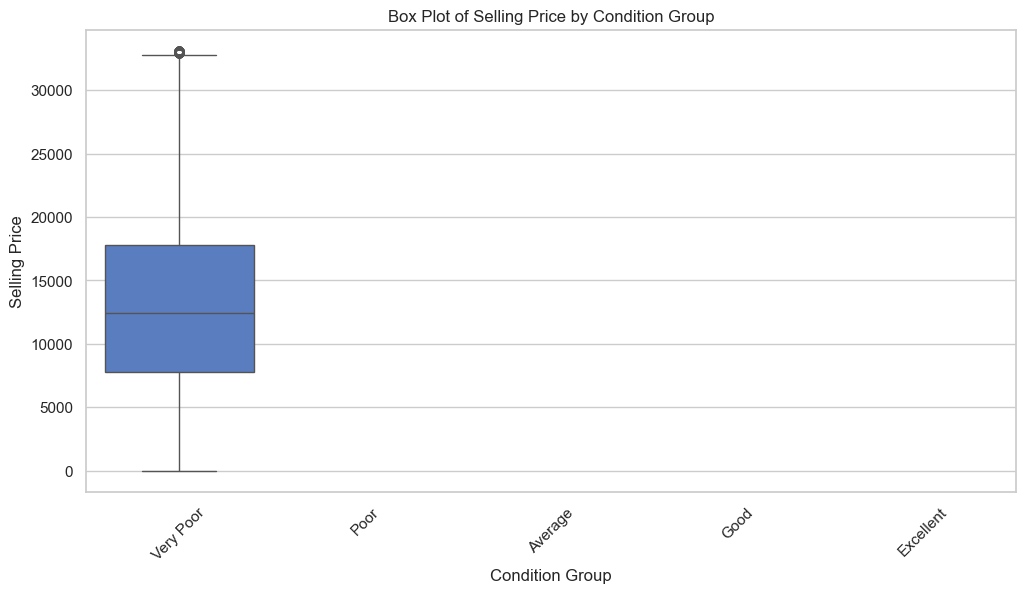

In [419]:
df['condition_group'] = pd.cut(df['condition'], 
                               bins=[0, 10, 20, 30, 40, 50],  
                               labels=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'], 
                               include_lowest=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='condition_group', y='sellingprice', palette='muted', order=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'])
plt.title('Box Plot of Selling Price by Condition Group')
plt.xlabel('Condition Group')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()


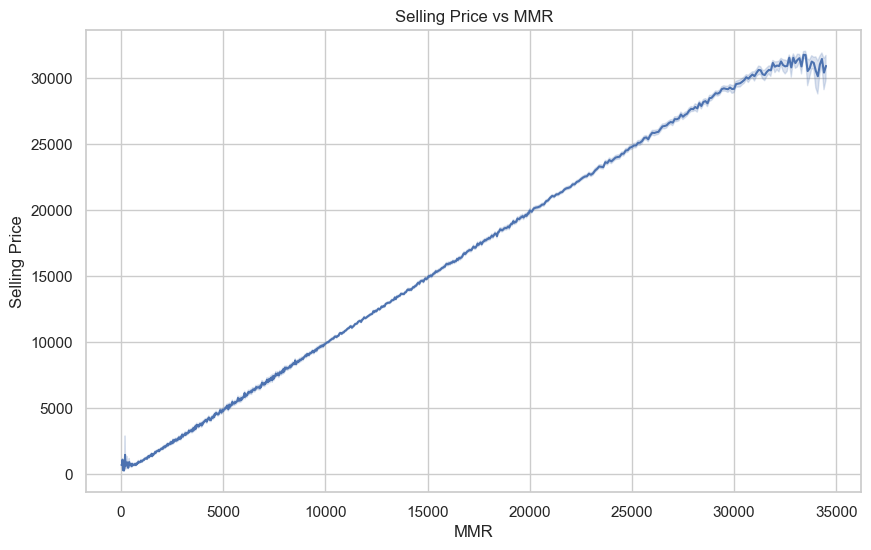

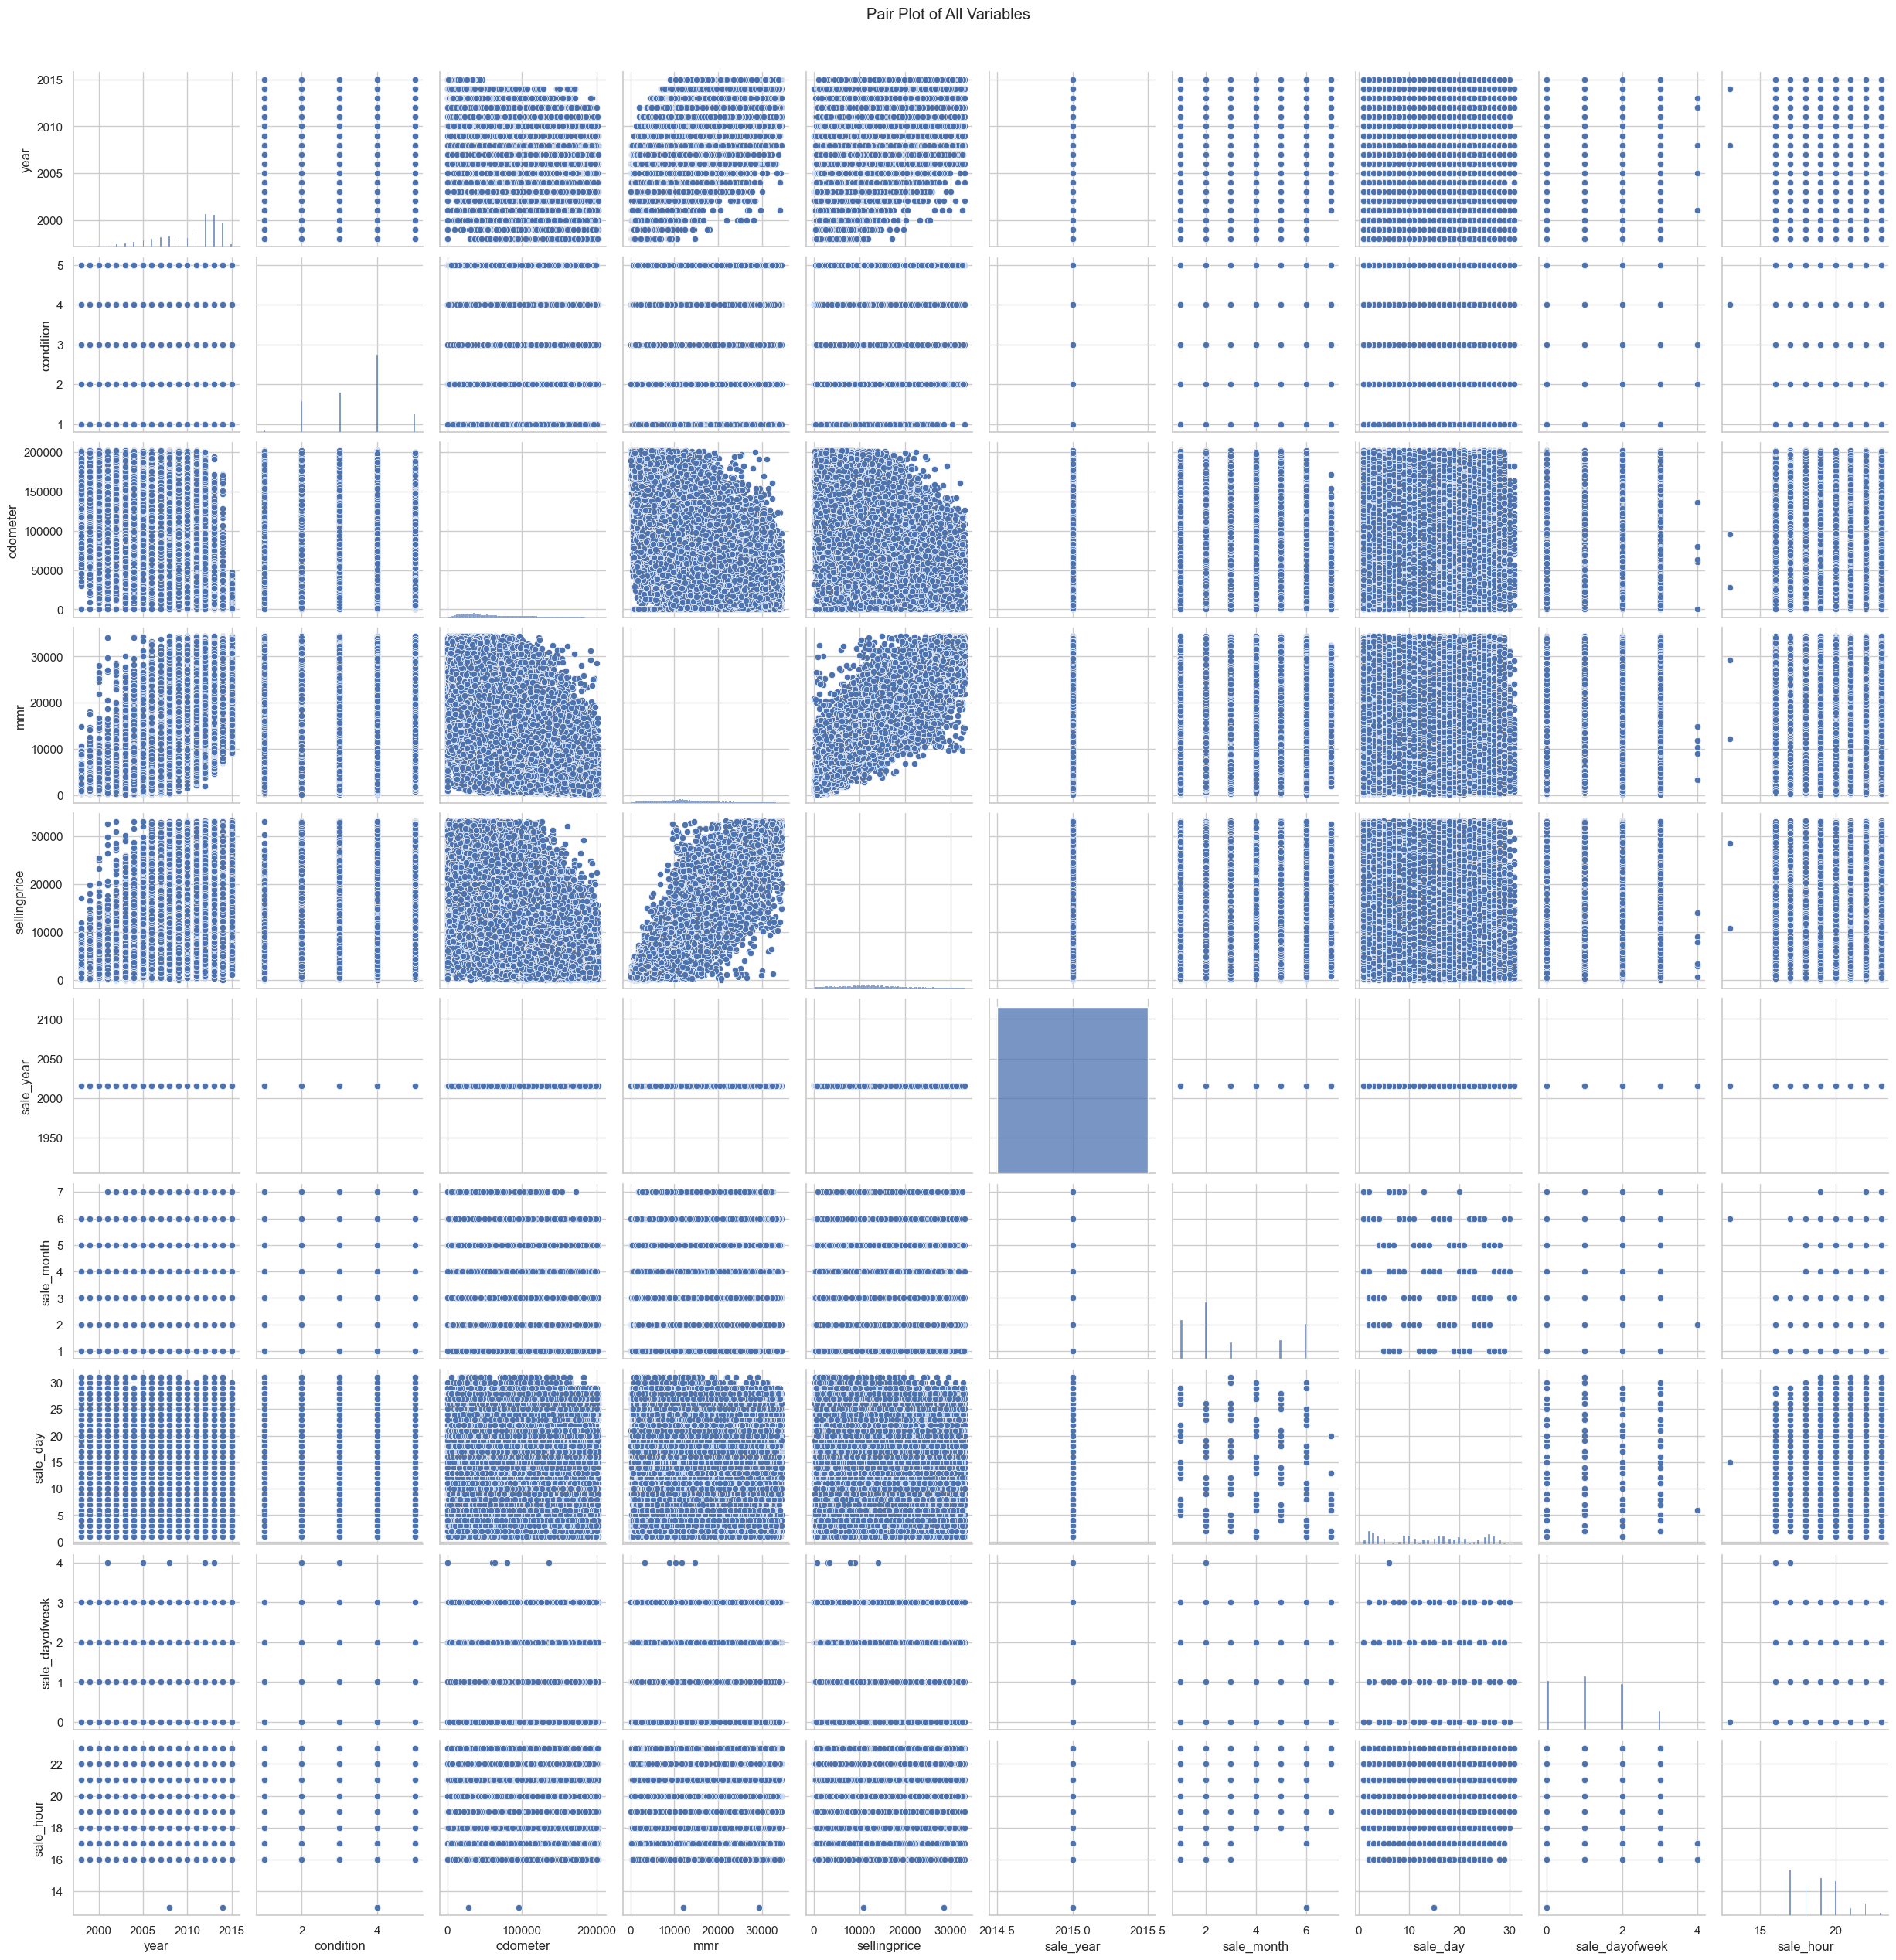

In [420]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='mmr', y='sellingprice', data=df)
plt.title('Selling Price vs MMR')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.show()

sns.pairplot(df)
plt.suptitle('Pair Plot of All Variables', y=1.02)
plt.show()

Text(0.5, 1.0, 'Year Vs Odometer')

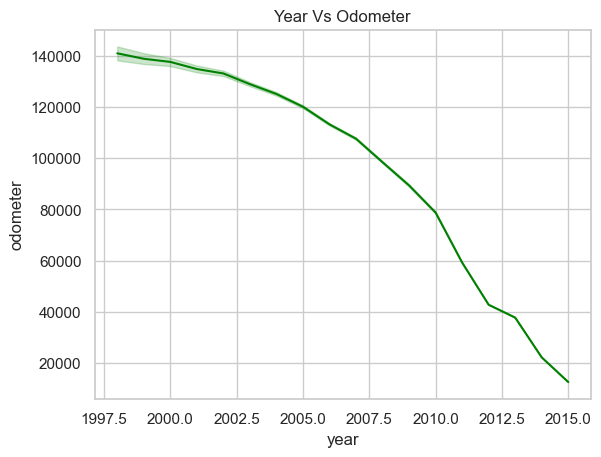

In [421]:
newdata=df[['year','odometer']]
sns.lineplot(data=newdata,x='year',y='odometer',color='green')
plt.title('Year Vs Odometer')

In [422]:
total_sales = df.groupby(['make', 'model']).agg({'sellingprice': 'sum'}).reset_index()

top_makes = total_sales.groupby('make')['sellingprice'].sum().nlargest(5).index

top_models = total_sales[total_sales['make'].isin(top_makes)]
top_models = top_models.loc[top_models.groupby('make')['sellingprice'].nlargest(3).reset_index(level=0, drop=True).index]

top_models


make           model  sellingprice
123  Chevrolet  Silverado 1500    79652696.0
106  Chevrolet           Cruze    55420578.0
114  Chevrolet          Malibu    49307146.0
171      Dodge   Grand Caravan    69501988.0
167      Dodge         Charger    43951111.0
173      Dodge         Journey    29363204.0
210       Ford           F-150   176850459.0
201       Ford          Escape   119275471.0
223       Ford          Fusion   114440428.0
513     Nissan          Altima   170827973.0
520     Nissan          Maxima    69025460.0
529     Nissan           Rogue    62820458.0
623     Toyota           Camry   107878156.0
627     Toyota         Corolla    54627663.0
639     Toyota            RAV4    36519594.0

C:\Users\eiadn\AppData\Local\Temp\ipykernel_22152\414271121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_sellers, x='sellingprice', y='seller', palette='viridis')


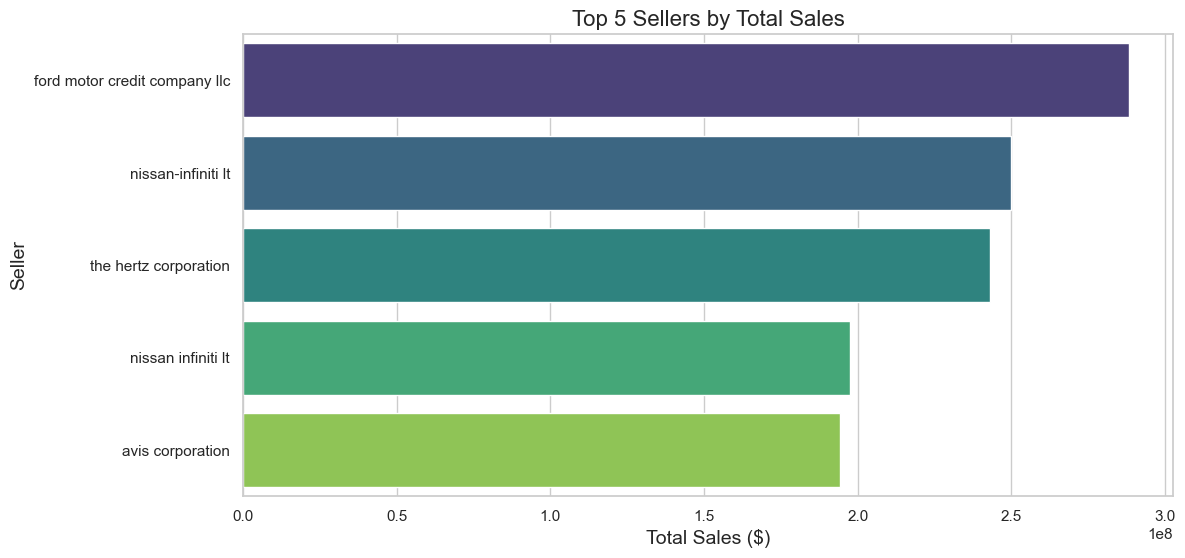

In [423]:

plt.figure(figsize=(12, 6))

sns.barplot(data=top_5_sellers, x='sellingprice', y='seller', palette='viridis')
plt.title('Top 5 Sellers by Total Sales', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('Seller', fontsize=14)

plt.show()


In [424]:
# MultiVariant Analysis

total_sales = df.groupby(['make', 'model']).agg({'sellingprice': 'sum'}).reset_index()
top_makes = total_sales.groupby('make')['sellingprice'].sum().nlargest(5).index
top_models = total_sales[total_sales['make'].isin(top_makes)]
top_models = top_models.loc[top_models.groupby('make')['sellingprice'].nlargest(3).reset_index(level=0, drop=True).index]

other_models = total_sales[total_sales['make'].isin(top_makes) & ~total_sales['model'].isin(top_models['model'])]
other_sales = other_models.groupby('make').agg({'sellingprice': 'sum'}).reset_index()
other_sales['model'] = 'Other'

combined_top_models = pd.concat([top_models, other_sales], ignore_index=True)

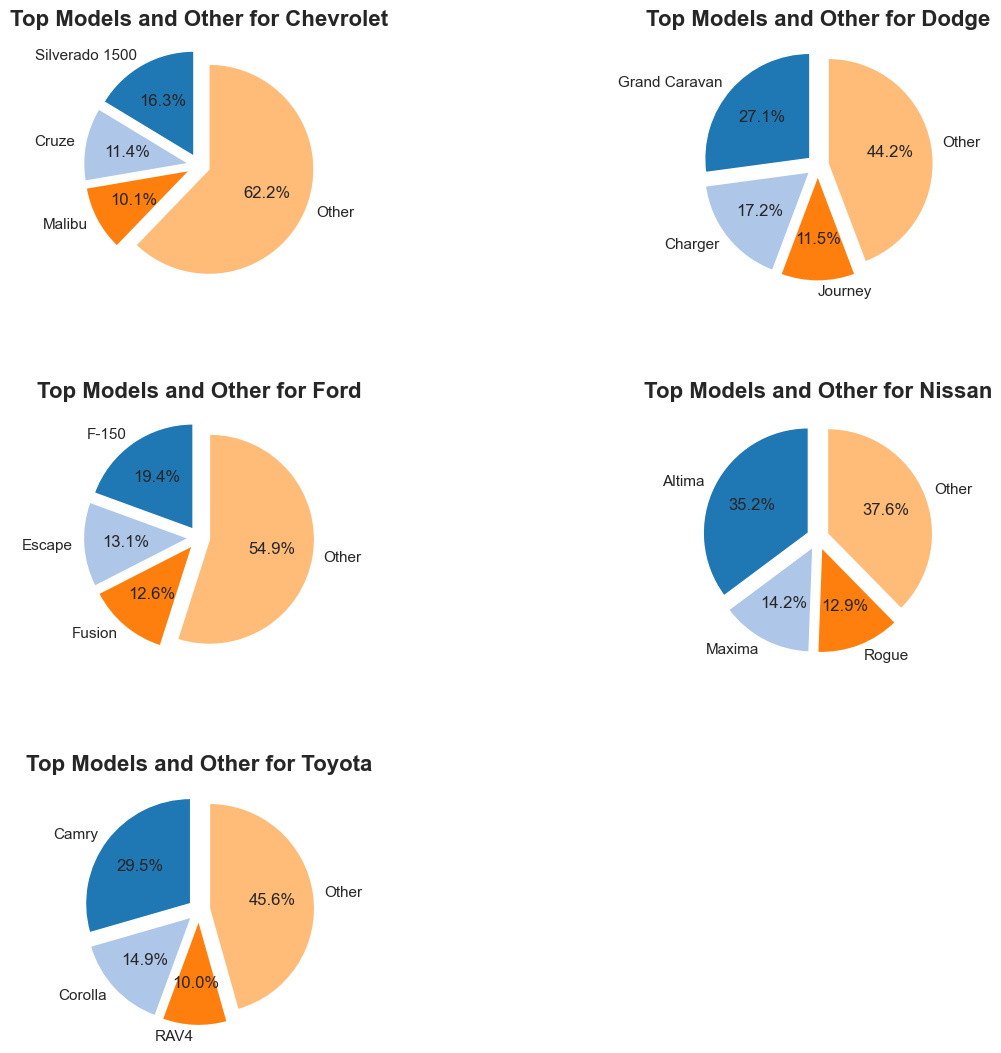

In [425]:
plt.figure(figsize=(14, 12))

for i, make in enumerate(combined_top_models['make'].unique(), start=1):
    plt.subplot(3, 2, i)  
    colors = plt.cm.tab20.colors
    plt.pie(combined_top_models[combined_top_models['make'] == make]['sellingprice'], 
            labels=combined_top_models[combined_top_models['make'] == make]['model'], 
            autopct='%1.1f%%', 
            startangle=90,
            colors=colors[:len(combined_top_models[combined_top_models['make'] == make])],
            explode=[0.1] * len(combined_top_models[combined_top_models['make'] == make])) 
    plt.title(f'Top Models and Other for {make}', fontsize=16, fontweight='bold')  

plt.tight_layout(pad=5)
plt.show()

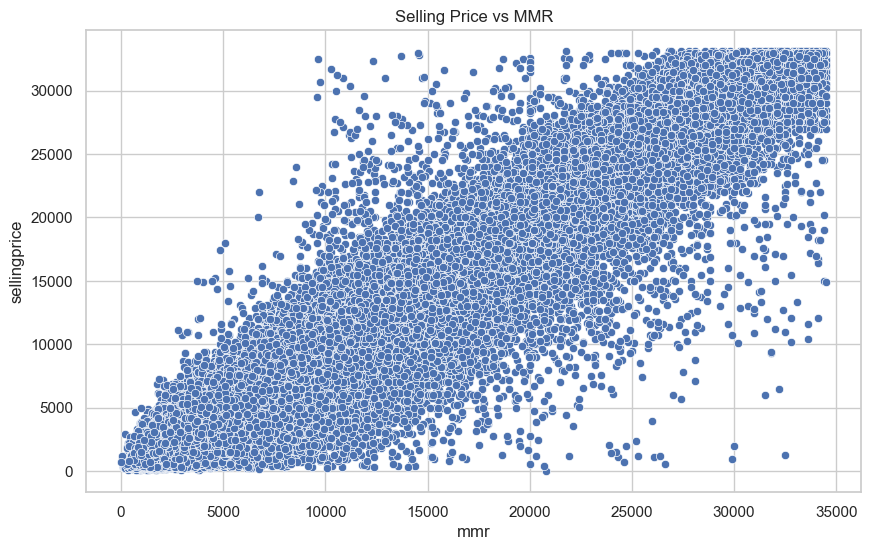

In [426]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mmr', y='sellingprice', data=df)
plt.title('Selling Price vs MMR')
plt.show()

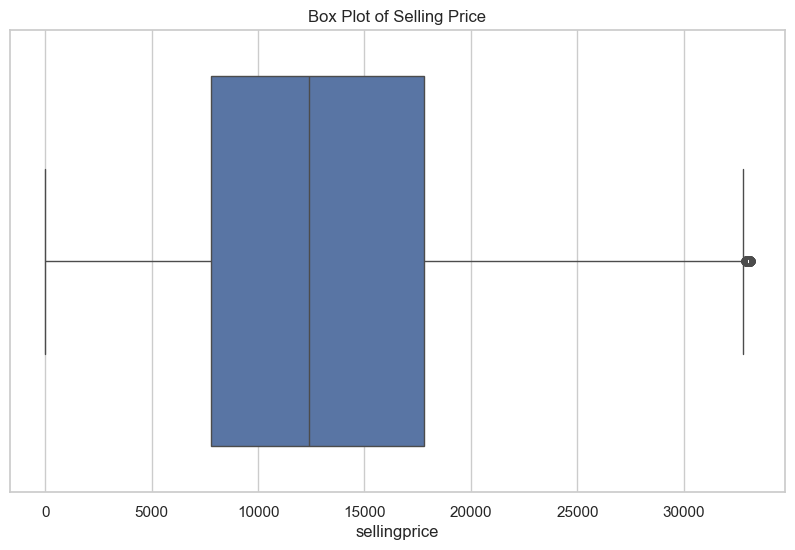

In [427]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sellingprice'])
plt.title('Box Plot of Selling Price')
plt.show()


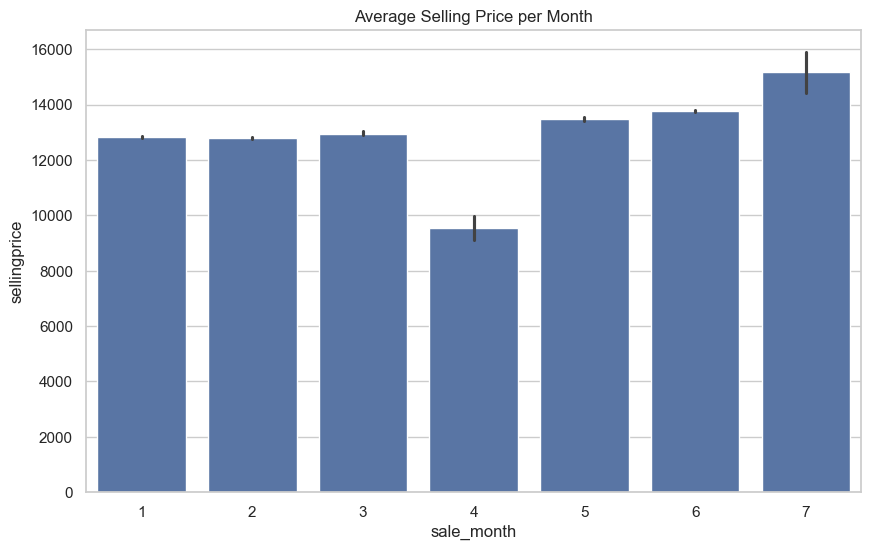

In [428]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sale_month', y='sellingprice', data=df)
plt.title('Average Selling Price per Month')
plt.show()


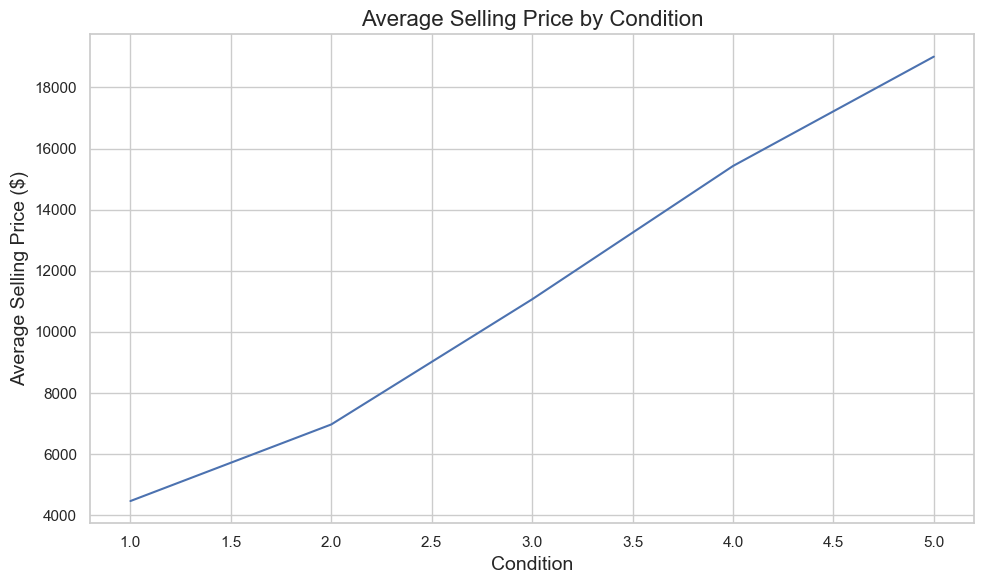

In [429]:
avg_price_by_condition = df.groupby('condition')['sellingprice'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_condition, x='condition', y='sellingprice')

plt.title('Average Selling Price by Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Average Selling Price ($)', fontsize=14)

plt.tight_layout()
plt.show()


C:\Users\eiadn\AppData\Local\Temp\ipykernel_22152\4112868468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='sellingprice', data=df, palette='viridis')


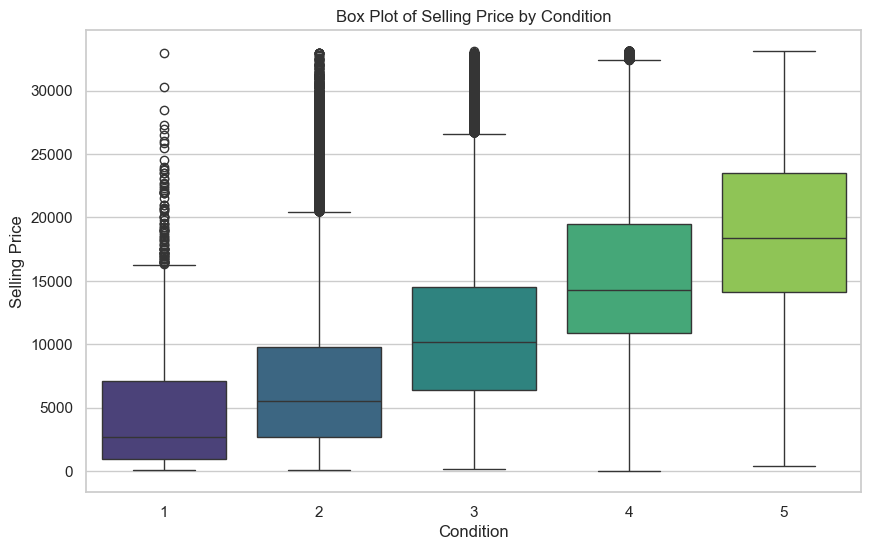

In [430]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='sellingprice', data=df, palette='viridis')

plt.title('Box Plot of Selling Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')

plt.show()

c:\Users\eiadn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


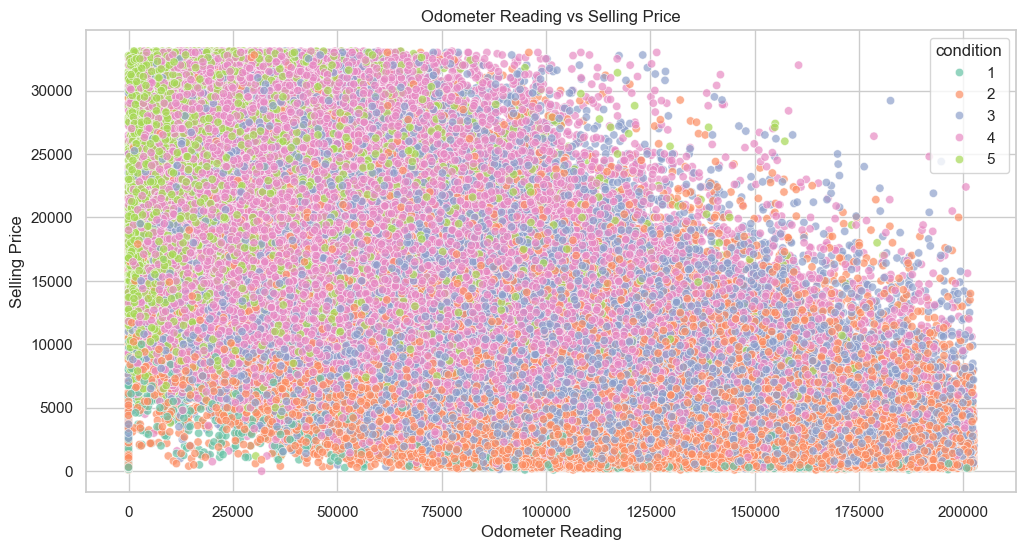

In [431]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='odometer', y='sellingprice', hue='condition', palette='Set2', alpha=0.7)
plt.title('Odometer Reading vs Selling Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()



In [432]:
df['odometer'].describe()

count    387485.000000
mean      63531.111999
std       44634.178054
min           1.000000
25%       28950.000000
50%       50787.000000
75%       92595.000000
max      202526.000000
Name: odometer, dtype: float64

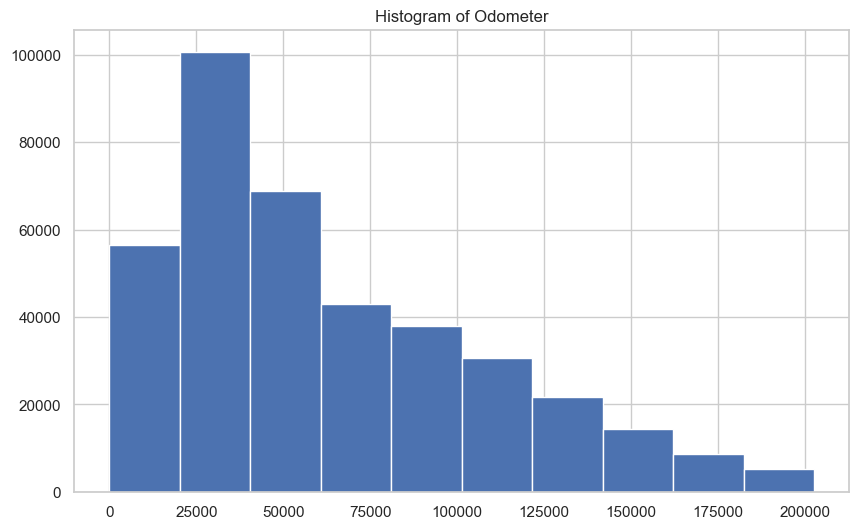

In [433]:
plt.figure(figsize=(10, 6))
df['odometer'].hist()
plt.title('Histogram of Odometer')
plt.show()

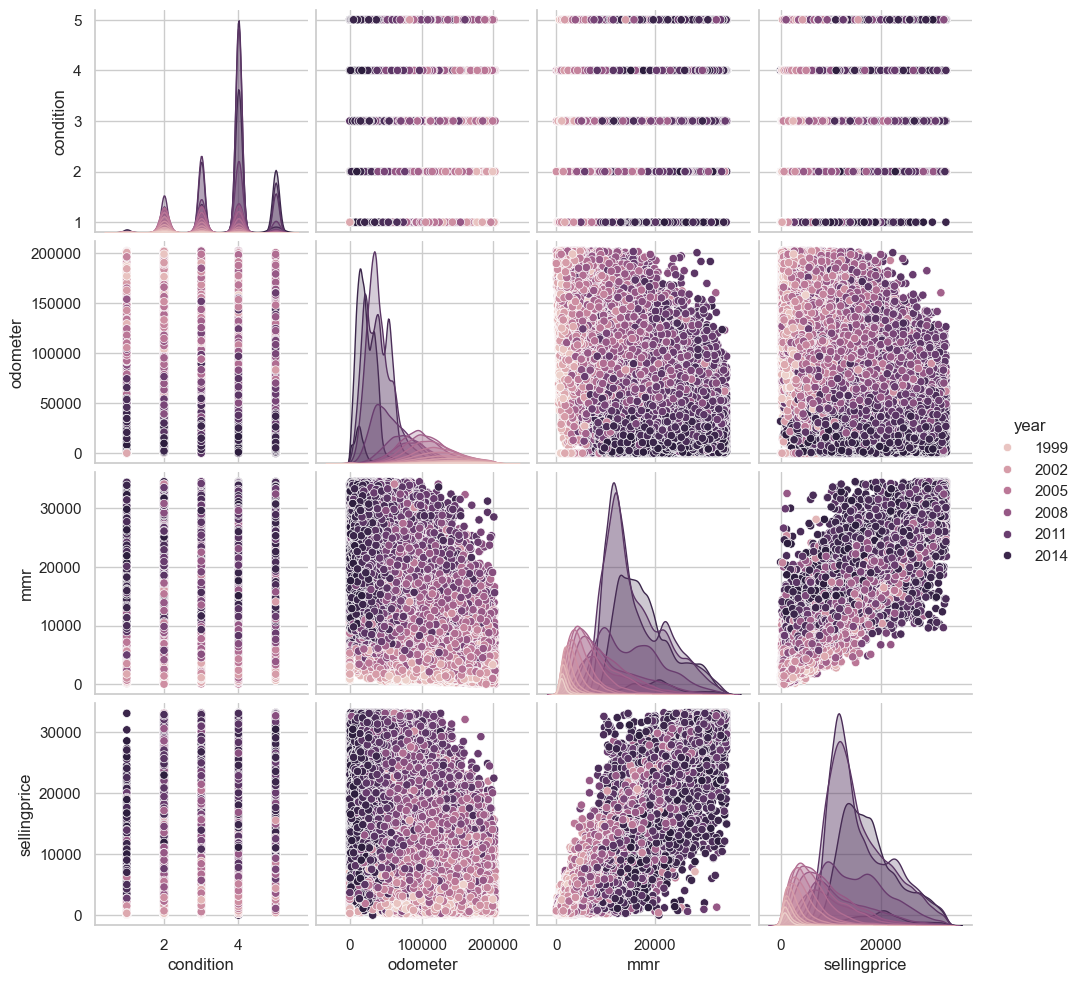

In [434]:
sns.pairplot(df,vars=['condition','odometer','mmr','sellingprice'],hue='year')
plt.show()

Text(0.5, 1.0, 'Year Vs Odometer')

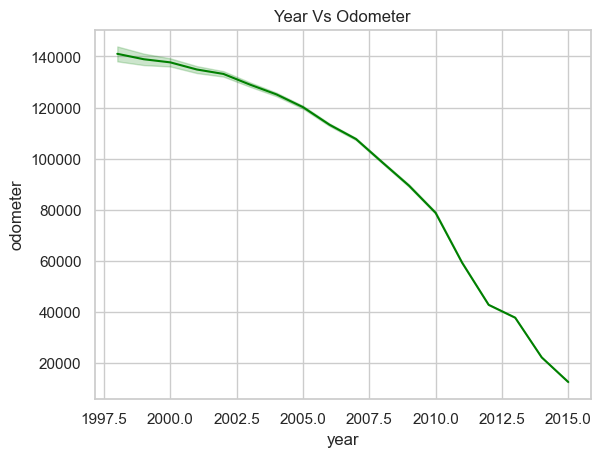

In [435]:
newdata=df[['year','odometer']]
sns.lineplot(data=newdata,x='year',y='odometer',color='green')
plt.title('Year Vs Odometer')

<Axes: xlabel='sellingprice', ylabel='mmr'>

c:\Users\eiadn\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\eiadn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


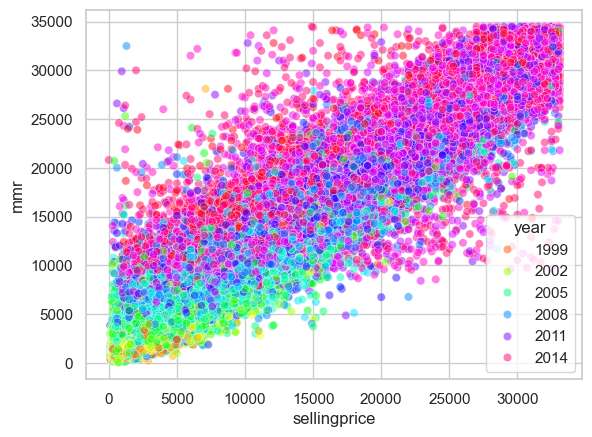

In [436]:
sns.scatterplot(x='sellingprice',y='mmr',data=df,hue='year',alpha=0.5,palette='hsv')

AttributeError: 'DataFrame' object has no attribute 'pointplot'

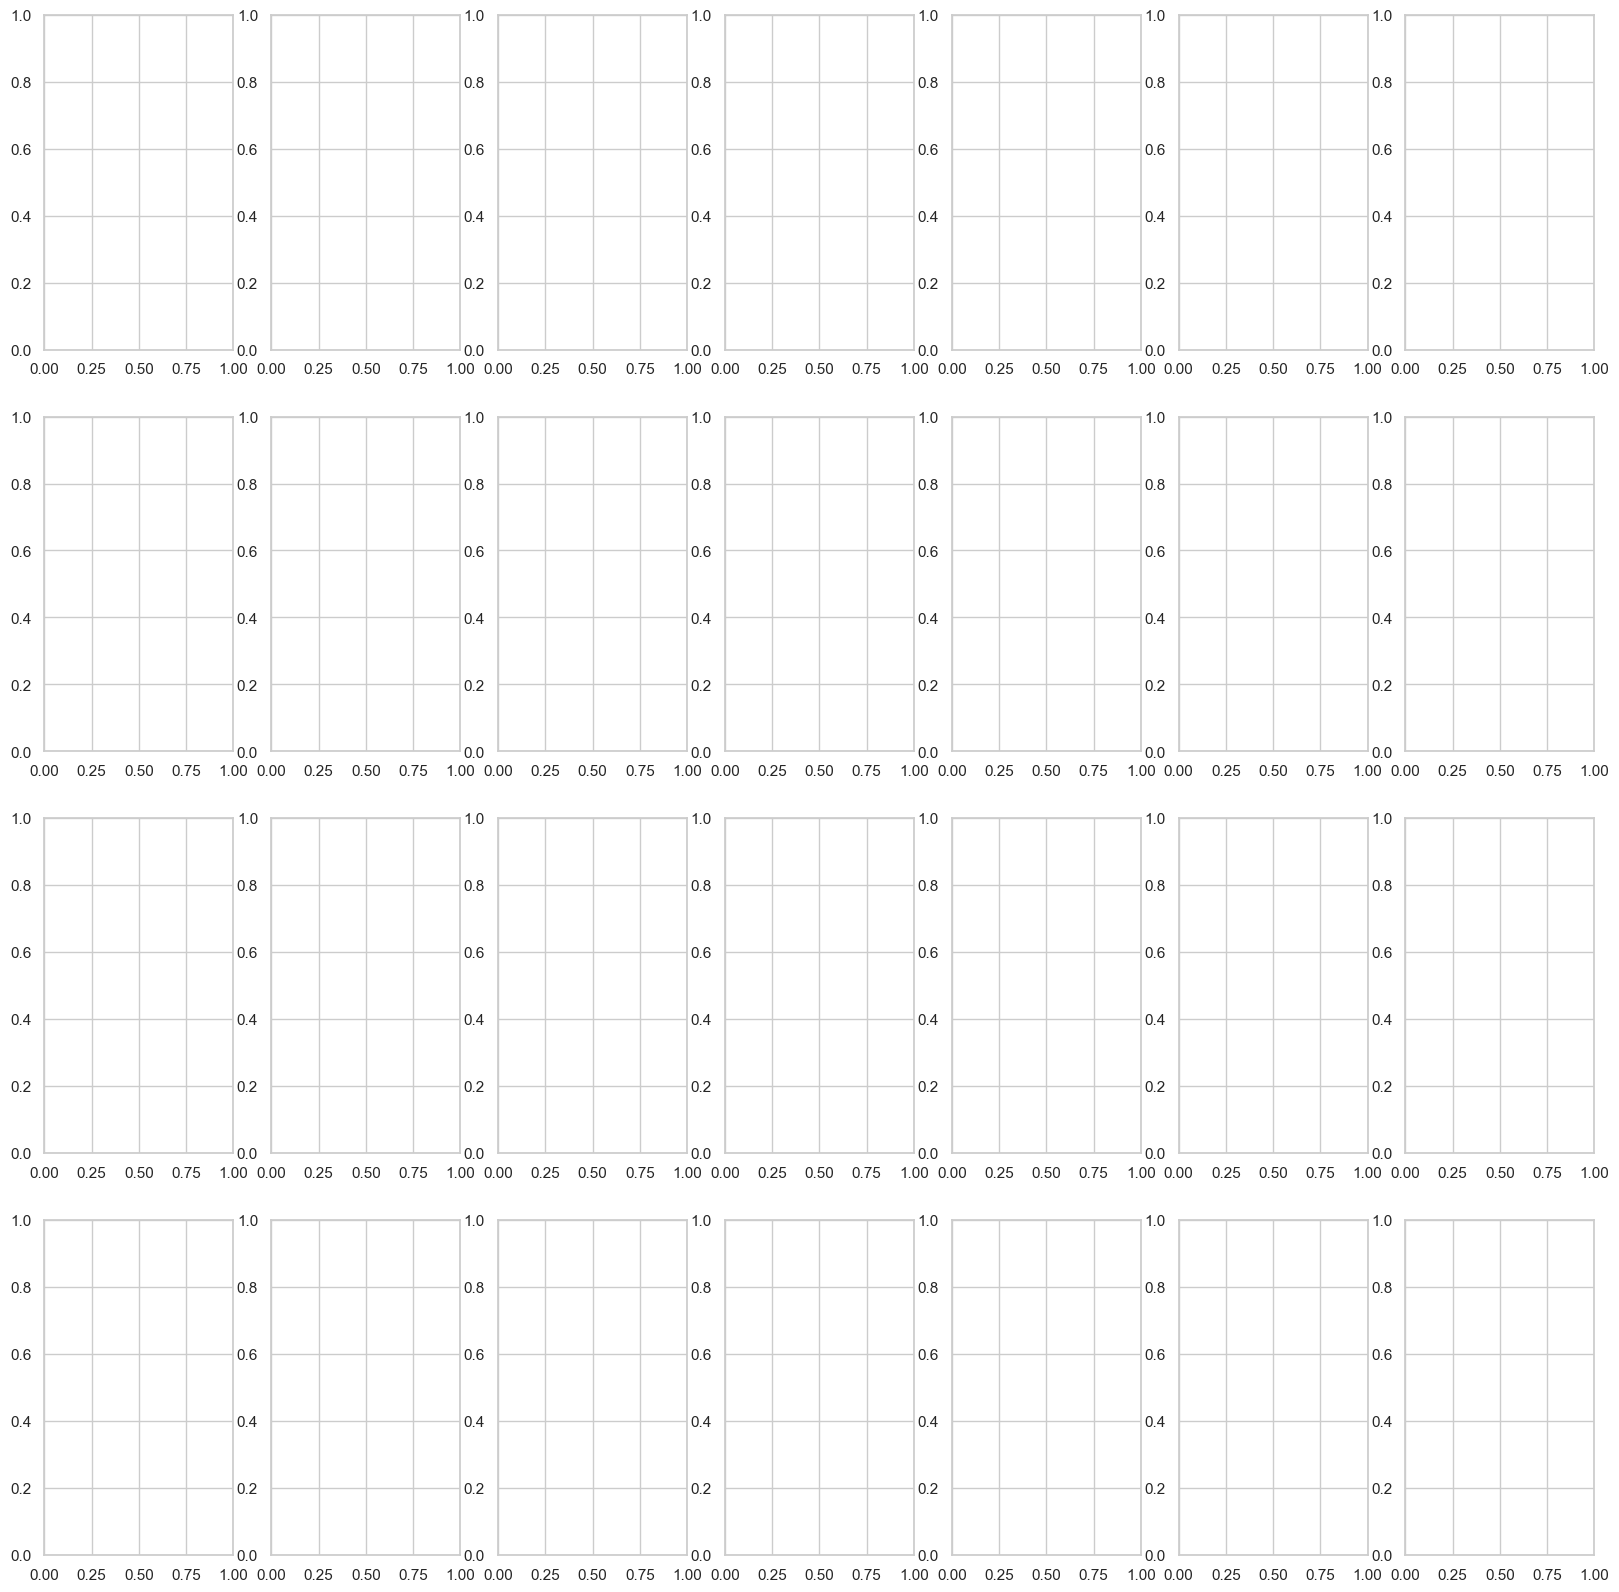

In [437]:
colors=['#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#6b4c9a',
    '#d6616b', '#d35400', '#8e44ad', '#3498db', '#e74c3c',
    '#2ecc71', '#f39c12', '#1abc9c', '#f1c40f', '#2980b9',
    '#e67e22']
df['month'] = df['saledate'].dt.month
years = df['saledate'].dt.year.unique()
grouped_data = df[['year', 'month', 'sellingprice']].groupby('year')
fig = plt.figure(figsize=(20, 20))
axes = fig.subplots(4, 7)
axes = axes.flatten()
count = 0
for i in years:
    df=grouped_data.get_group(i)
    df.pointplot(data=df,x='month',y='sellingprice',ax=axes[count],color=colors[count],ci=None)
    axes[count].set_title(f'Year {i}')
    count+=1
fig.delaxes(axes[-2])
fig.delaxes(axes[-1])
plt.tight_layout()

In [355]:
model_n = df.groupby(['make','model'],as_index=False).count().sort_values('year',ascending=False)
model_n.head(10)

plt.figure(figsize=(22,14))

sns.barplot(data=model_n.head(30), x='model',y='year', hue='model')

plt.xlabel('Brand Name',fontsize=24)
plt.ylabel('Number Of Car',fontsize=24)
plt.title('Visualization Most Big 25 Car Model ',fontsize=26)
plt.xticks(rotation=90 , fontsize=22)
plt.yticks(fontsize=22)
plt.legend(title='Model', fontsize=12, loc='upper right')

plt.show()

KeyError: 'make'

In [275]:
df[df['color'] == '—'].count()


year               0
make               0
model              0
trim               0
body               0
transmission       0
state              0
condition          0
odometer           0
color              0
interior           0
seller             0
mmr                0
sellingprice       0
saledate           0
sale_year          0
sale_month         0
sale_day           0
sale_dayofweek     0
sale_hour          0
condition_group    0
dtype: int64

In [273]:
weird_rows = df[df['color'] == '—']
print(weird_rows.count())

year               0
make               0
model              0
trim               0
body               0
transmission       0
state              0
condition          0
odometer           0
color              0
interior           0
seller             0
mmr                0
sellingprice       0
saledate           0
sale_year          0
sale_month         0
sale_day           0
sale_dayofweek     0
sale_hour          0
condition_group    0
dtype: int64


C:\Users\eiadn\AppData\Local\Temp\ipykernel_5504\1471316911.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\eiadn\AppData\Local\Temp\ipykernel_5504\1471316911.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
c:\Users\eiadn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


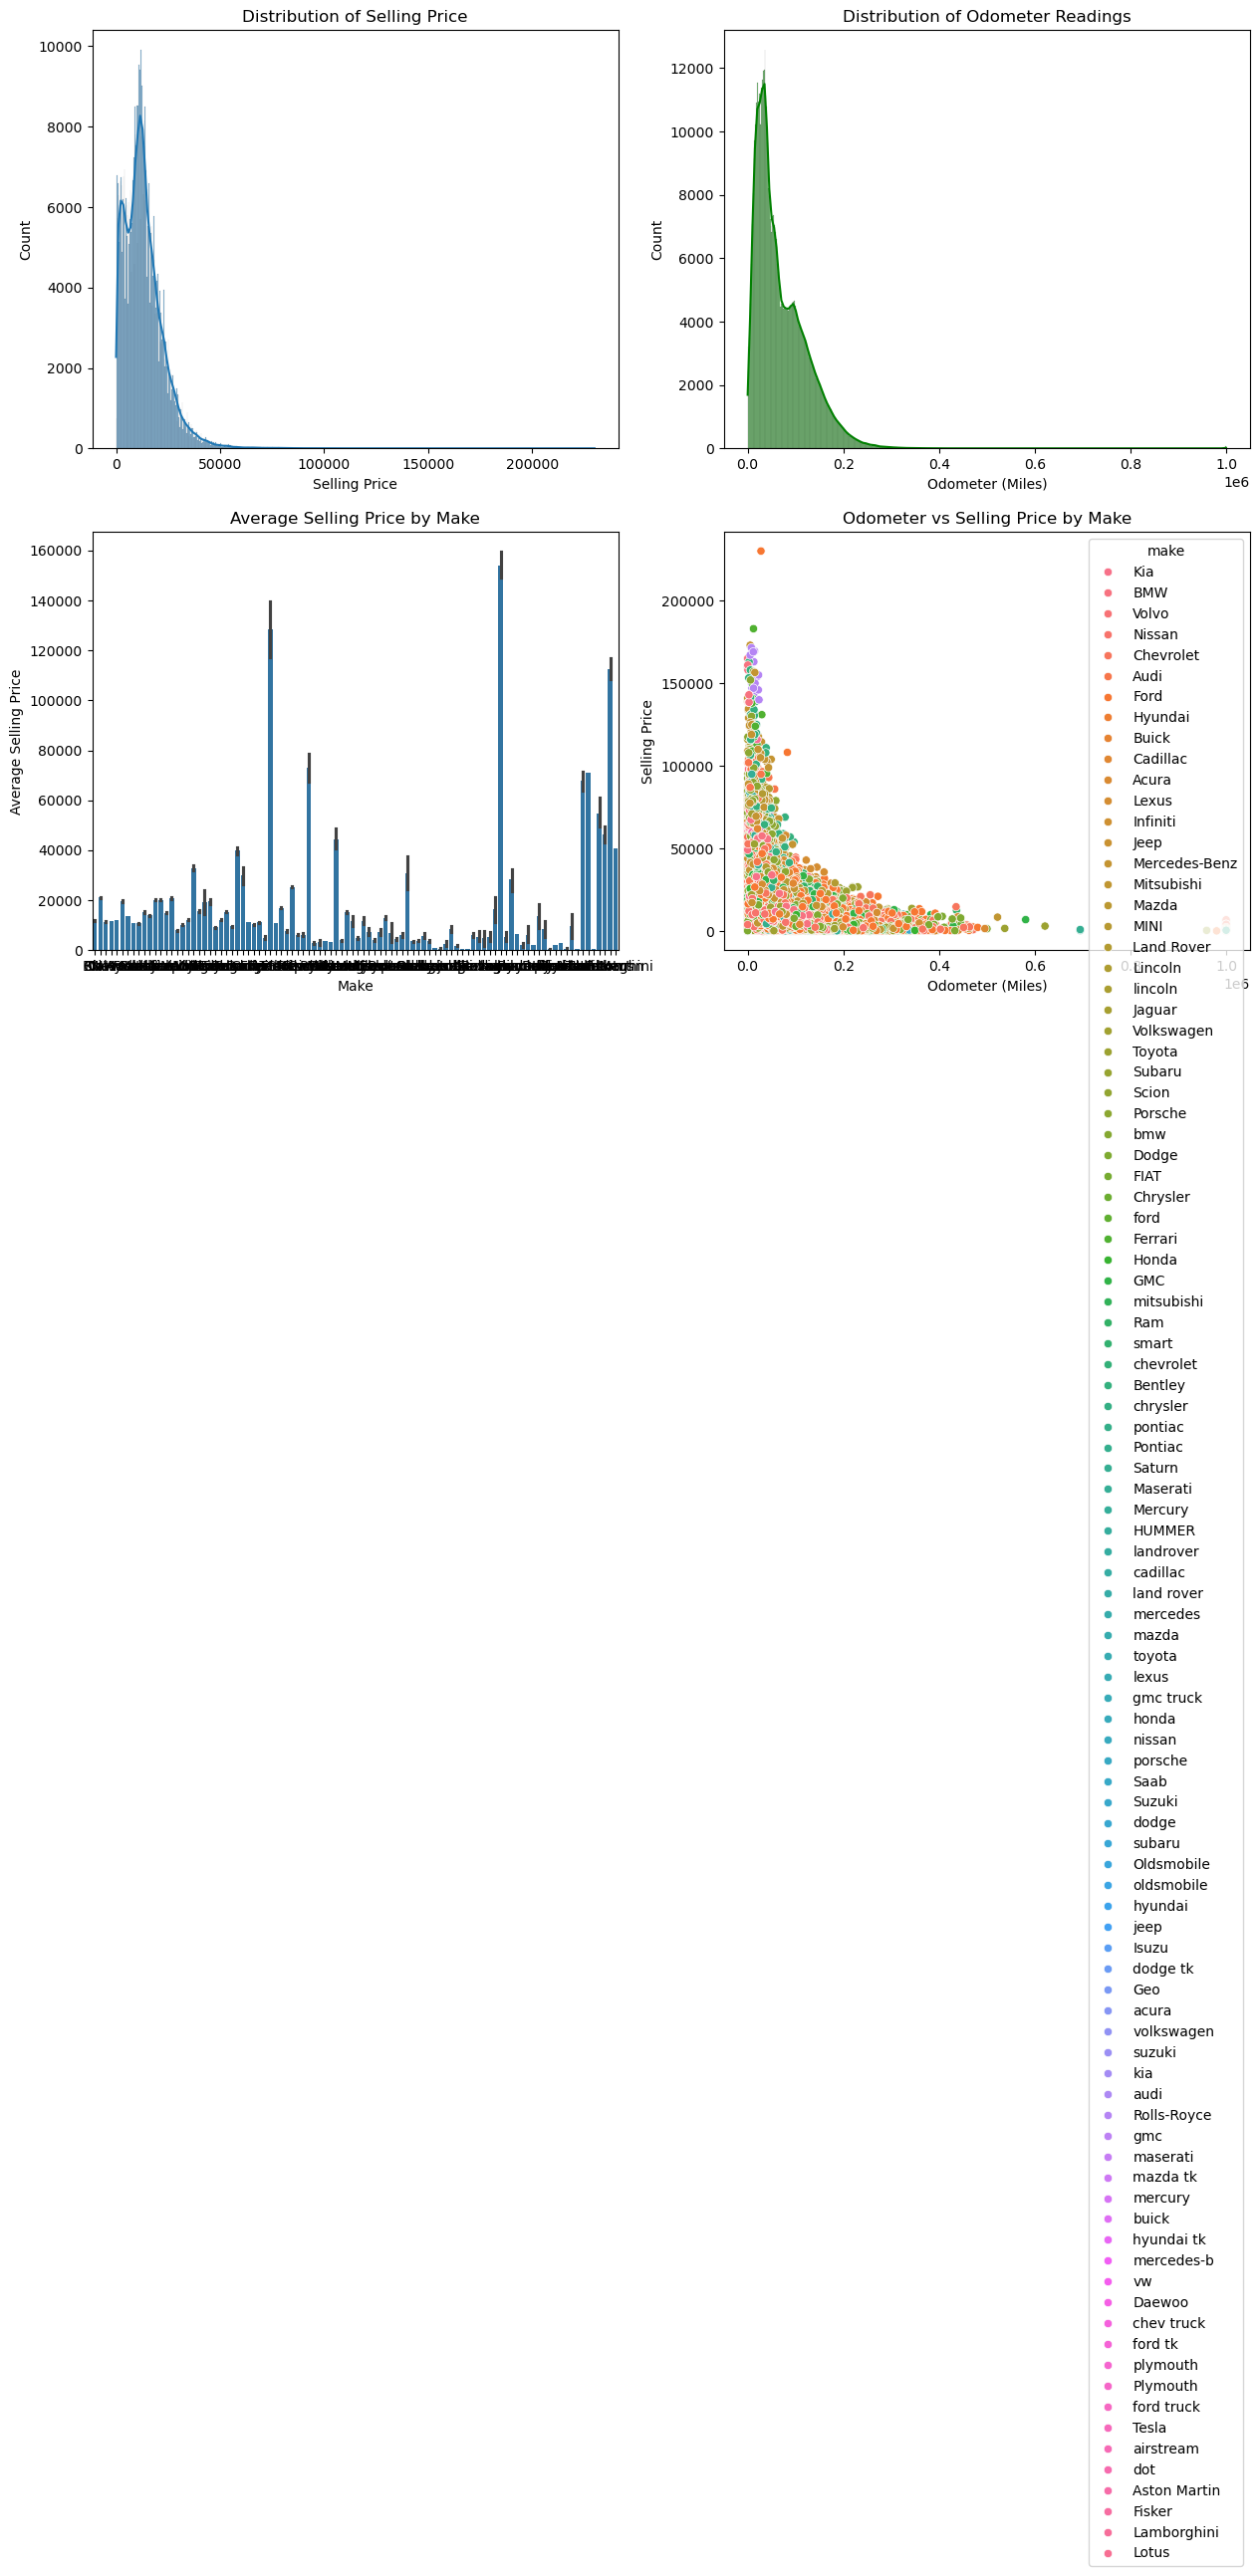

In [244]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.histplot(df['sellingprice'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Selling Price')
axes[0, 0].set_xlabel('Selling Price')

sns.histplot(df['odometer'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Odometer Readings')
axes[0, 1].set_xlabel('Odometer (Miles)')

sns.barplot(x='make', y='sellingprice', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Average Selling Price by Make')
axes[1, 0].set_xlabel('Make')
axes[1, 0].set_ylabel('Average Selling Price')

sns.scatterplot(x='odometer', y='sellingprice', hue='make', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Odometer vs Selling Price by Make')
axes[1, 1].set_xlabel('Odometer (Miles)')
axes[1, 1].set_ylabel('Selling Price')

plt.tight_layout()
plt.show()

In [249]:
sns.barplot(x='make', y='sellingprice', data=df, ax=axes[1, 0])
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>